# 1. Data Collection, Preprocessing and EDA

In [241]:
# Libraries needed
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import re 
from fuzzywuzzy import process, fuzz
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


## 1.1 Datasets

Read datasets and combine relevant columns into one table. 

### 1.1.1 Revel

The datasets obtained from Revel Systems go from July 1st, 2023 to June 30th, 2024 (one year).

In [155]:
# Find all directory paths
directory_path = '/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/Sales Report Revel/'
file_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.csv')]

# Open all files as data frames and combine them
data_frames = [pd.read_csv(file) for file in file_paths]
revel_combined_df = pd.concat(data_frames, ignore_index=True)

# Save the dataframe
revel_combined_df.to_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Revel Combined.csv')


In [156]:
revel_combined_df.head()

,Reporting No,Order No,Offline No,Created By,First Opened,Last Closed,Net Sales,Tax,Final Total,Payments Total
0,652038,1417308,1417308,"Ellerbeck, Lindsay",05/31/2024 05:03:29 PM,05/31/2024 05:04:01 PM,42.45,0.78,43.23,43.23
1,652037,1417305,1417305,"Ellerbeck, Lindsay",05/31/2024 04:59:59 PM,05/31/2024 05:00:41 PM,14.00,1.82,15.82,15.82
2,652036,1417304,1417304,"Velazquez, Itzel",05/31/2024 04:59:43 PM,05/31/2024 05:00:46 PM,33.45,0.98,34.43,34.43
3,652035,1417301,1417301,"Ellerbeck, Lindsay",05/31/2024 04:57:13 PM,05/31/2024 04:59:04 PM,19.25,2.50,21.75,21.75
4,652034,1417299,1417299,"Velazquez, Itzel",05/31/2024 04:56:23 PM,05/31/2024 04:56:54 PM,47.95,0.78,48.73,48.73


### 1.1.2 Shopify

The datasets obtained from Shopify go from Jun 1st, 2022 to Jun 30th, 2024 (two years). 

In [254]:

net_sales_df = pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/Sales Report Shopify/2 Years/net_sales_2022-06-01_2024-06-30.csv')
payment_by_type_df = pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/Sales Report Shopify/2 Years/payment_by_type_2022-06-01_2024-06-30.csv')
product_order_and_returns_df = pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/Sales Report Shopify/2 Years/product_order_and_returns_2022-06-01_2024-06-30.csv')
sales_by_customer_df = pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/Sales Report Shopify/2 Years/sales_by_customer_2022-06-01_2024-06-30.csv')
sales_by_product_df = pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/Sales Report Shopify/2 Years/sales_by_product_2022-06-01_2024-06-30.csv')
sales_by_product_variant_df = pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/Sales Report Shopify/2 Years/sales_by_product_variant_2022-06-01_2024-06-30.csv')


#### 1.1.2.1 Combine Shopify data frames

In [255]:
net_sales_df.head()


,Sale ID,Date,Order ID,Order,Product,Net sales
0,13087920095372,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50
1,13087920160908,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50
2,13087920193676,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,20.95
3,13087920029836,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,13.50
4,13087920062604,2022-06-01T05:55:27-04:00,4089814286476,#19176,Breakfast Pastry Platter,40.00


In [256]:
payment_by_type_df.head()


,Transaction ID,Date,Order ID,Order,Payment type,Credit card,Credit card type,Billing country,Gift card ID,Gross payments,Refunds,Net payments
0,5008939810956,2022-06-01T05:55:23-04:00,4089814286476,#19176,Shopify Payments,Mastercard,Standard,Canada,0,147.15,0.0,147.15
1,5009045684364,2022-06-01T08:08:34-04:00,4089902530700,#19177,Manual,NaN,NaN,Canada,0,171.76,0.0,171.76
2,5009083662476,2022-06-01T08:57:25-04:00,4089942933644,#19178,PayPal Payments Standard,NaN,NaN,Canada,0,63.28,0.0,63.28
3,5009104699532,2022-06-01T09:24:44-04:00,4089973964940,#19179,Shopify Payments,Mastercard,Standard,Canada,0,24.00,0.0,24.00
4,5009131176076,2022-06-01T09:57:27-04:00,4089998246028,#19180,Manual,NaN,NaN,Canada,0,15.95,0.0,15.95


In [257]:
# Keep only relevant columns to be merged with Net Sales
payment_by_type_df = payment_by_type_df[['Order ID', 'Payment type', 'Credit card', 'Credit card type', 'Billing country', 'Refunds', 'Net payments']]

payment_by_type_df.head()


,Order ID,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments
0,4089814286476,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15
1,4089902530700,Manual,NaN,NaN,Canada,0.0,171.76
2,4089942933644,PayPal Payments Standard,NaN,NaN,Canada,0.0,63.28
3,4089973964940,Shopify Payments,Mastercard,Standard,Canada,0.0,24.00
4,4089998246028,Manual,NaN,NaN,Canada,0.0,15.95


In [258]:
product_order_and_returns_df.head()

,product_title,ordered_item_quantity,returned_item_quantity_abs,returned_item_rate
0,Assorted Holiday Cookies,1116,20,0.01792
1,6 Cupcakes,954,50,0.05241
2,Lunch Box - Individual,775,3,0.00387
3,Quiche,757,18,0.02377
4,Pumpkin Pie,745,14,0.01879


In [259]:
# Keep only relevant columns to be merged with Net Sales
product_order_and_returns_df = product_order_and_returns_df[['product_title', 'returned_item_rate']]
product_order_and_returns_df.head()

,product_title,returned_item_rate
0,Assorted Holiday Cookies,0.01792
1,6 Cupcakes,0.05241
2,Lunch Box - Individual,0.00387
3,Quiche,0.02377
4,Pumpkin Pie,0.01879


##### 1.1.2.2 Join 'Net Sales' and 'Payment by Type'

In [260]:
#Left-join 'Net sales' and 'Payment by type' data frames
ns_pt_df = pd.merge(net_sales_df, payment_by_type_df, how='left', on='Order ID')
ns_pt_df.head()

,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments
0,13087920095372,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15
1,13087920160908,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15
2,13087920193676,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,20.95,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15
3,13087920029836,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,13.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15
4,13087920062604,2022-06-01T05:55:27-04:00,4089814286476,#19176,Breakfast Pastry Platter,40.00,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15


##### 1.1.2.3 Join 'Product Order and Returns' and Shopify_Combined

In [261]:
#Left-join 'ns_pt_pd' and 'Product Order and Returns'
shopify_combined_df = pd.merge(ns_pt_df, product_order_and_returns_df, how='left', left_on='Product', right_on='product_title')
shopify_combined_df.head()

,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,product_title,returned_item_rate
0,13087920095372,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,Buttertarts,0.02301
1,13087920160908,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,Buttertarts,0.02301
2,13087920193676,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,20.95,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,Baked Fruit Tart,0.02238
3,13087920029836,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,13.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,Baked Fruit Tart,0.02238
4,13087920062604,2022-06-01T05:55:27-04:00,4089814286476,#19176,Breakfast Pastry Platter,40.00,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,Breakfast Pastry Platter,0.00724


##### 1.1.2.4 Join 'Shopify Combined' and 'Sales by Product'


In [262]:
sales_by_product_df.head()


,product_title,product_vendor,product_type,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales
0,Quiche,Bread & Butter Bakery and Fine Pastries,savoury,750,21954.0,-288.18,-537.0,21128.82,0.0,21128.82
1,6 Cupcakes,Bread & Butter,Cakes,909,22153.5,-232.88,-1149.0,20771.62,0.0,20771.62
2,Sandwich Platter,Bread & Butter Bakery and Fine Pastries,Catering,288,21305.0,-291.61,-1663.0,19350.39,1226.6,20576.99
3,Vanilla Buttercake with Raspberry Buttercream,Bread & Butter Bakery and Fine Pastries,Cakes,536,19236.0,-65.00,-580.0,18591.00,0.0,18591.00
4,Assorted Holiday Cookies,Bread & Butter Bakery and Fine Pastries,Cookies,1105,18586.5,-170.04,-289.1,18127.36,0.0,18127.36


In [263]:
# Remove columns not relevant to merge
sales_by_product_df = sales_by_product_df[['product_title', 'product_type']]
sales_by_product_df.head()

,product_title,product_type
0,Quiche,savoury
1,6 Cupcakes,Cakes
2,Sandwich Platter,Catering
3,Vanilla Buttercake with Raspberry Buttercream,Cakes
4,Assorted Holiday Cookies,Cookies


In [264]:
# Left-join 'Shopify Combined' and 'Sales by Product'
shopify_combined_df = pd.merge(shopify_combined_df, sales_by_product_df, how='left', on='product_title').drop(columns=['product_title'])
shopify_combined_df.head()


,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type
0,13087920095372,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry
1,13087920160908,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry
2,13087920193676,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,20.95,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,Dessert
3,13087920029836,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,13.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,Dessert
4,13087920062604,2022-06-01T05:55:27-04:00,4089814286476,#19176,Breakfast Pastry Platter,40.00,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.00724,Breakfast


In [265]:
# Save the combined data frame
shopify_combined_df.to_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Shopify Combined.csv', index=False)


In [266]:
shopify_combined_df.head()

,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type
0,13087920095372,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry
1,13087920160908,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry
2,13087920193676,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,20.95,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,Dessert
3,13087920029836,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,13.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,Dessert
4,13087920062604,2022-06-01T05:55:27-04:00,4089814286476,#19176,Breakfast Pastry Platter,40.00,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.00724,Breakfast


## 1.2 Preprocessing and EDA

### 1.2.1 Revel Data Frame

In [170]:
revel_combined_df.head()

,Reporting No,Order No,Offline No,Created By,First Opened,Last Closed,Net Sales,Tax,Final Total,Payments Total
0,652038,1417308,1417308,"Ellerbeck, Lindsay",05/31/2024 05:03:29 PM,05/31/2024 05:04:01 PM,42.45,0.78,43.23,43.23
1,652037,1417305,1417305,"Ellerbeck, Lindsay",05/31/2024 04:59:59 PM,05/31/2024 05:00:41 PM,14.00,1.82,15.82,15.82
2,652036,1417304,1417304,"Velazquez, Itzel",05/31/2024 04:59:43 PM,05/31/2024 05:00:46 PM,33.45,0.98,34.43,34.43
3,652035,1417301,1417301,"Ellerbeck, Lindsay",05/31/2024 04:57:13 PM,05/31/2024 04:59:04 PM,19.25,2.50,21.75,21.75
4,652034,1417299,1417299,"Velazquez, Itzel",05/31/2024 04:56:23 PM,05/31/2024 04:56:54 PM,47.95,0.78,48.73,48.73


#### 1.2.1.1 Check data types in each column

In [171]:
revel_combined_df.dtypes

Reporting No        int64
Order No            int64
Offline No         object
Created By         object
First Opened       object
Last Closed        object
Net Sales         float64
Tax               float64
Final Total       float64
Payments Total    float64
dtype: object

In [172]:
# Convert First Opened and Last Closed columns to date types
revel_combined_df['First Opened'] = pd.to_datetime(revel_combined_df['First Opened'], format = '%m/%d/%Y %I:%M:%S %p')
revel_combined_df['Last Closed'] = pd.to_datetime(revel_combined_df['Last Closed'], format = '%m/%d/%Y %I:%M:%S %p')
revel_combined_df.dtypes

Reporting No               int64
Order No                   int64
Offline No                object
Created By                object
First Opened      datetime64[ns]
Last Closed       datetime64[ns]
Net Sales                float64
Tax                      float64
Final Total              float64
Payments Total           float64
dtype: object

#### 1.2.1.2 Check for Null values

In [173]:
has_null = revel_combined_df.isnull().values.any()

print("Does the DataFrame have any null values?:", has_null)

Does the DataFrame have any null values?: False


#### 1.2.1.3 Descriptive Statistics (numerical values only)

In [174]:
revel_combined_df.describe().select_dtypes(include=['number'])

,Reporting No,Order No,Net Sales,Tax,Final Total,Payments Total
count,83867.000000,8.386700e+04,83867.000000,83867.000000,83867.000000,83867.000000
mean,616704.833248,1.337294e+06,29.444343,1.042693,30.464422,30.464422
min,574088.000000,1.240720e+06,-240.000000,-16.120000,-240.000000,-240.000000
25%,595054.500000,1.287802e+06,12.450000,0.000000,13.280000,13.280000
50%,616706.000000,1.337756e+06,22.900000,0.770000,23.950000,23.950000
75%,638265.500000,1.386237e+06,38.700000,1.630000,39.960000,39.960000
max,659232.000000,1.434279e+06,1750.000000,120.380000,1750.000000,1750.000000
std,24705.922952,5.616978e+04,26.653513,1.278240,27.039330,27.039330


#### 1.2.1.4 Feature Engineering
- Delete redundant/not useful columns
- Create 'Transaction Duration' (total seconds)
- Extract the hour of the day from 'First Opened'
- Create 'Transactions per Hour' 


In [175]:
# Delete redundant columns
revel_combined_df = revel_combined_df.drop(columns=['Offline No', 'Payments Total'])

In [176]:
# Create 'Transaction Duration' column
revel_combined_df['Transaction Duration'] = (revel_combined_df['Last Closed'] - revel_combined_df['First Opened']).dt.total_seconds()

# Create 'Hour' column
revel_combined_df['Hour'] = revel_combined_df['First Opened'].dt.hour
revel_combined_df['Date'] = revel_combined_df['First Opened'].dt.date

# Calculate and create 'Transactions per Hour' column
transactions_per_hour = revel_combined_df.groupby(['Date', 'Hour']).size().reset_index(name='Transactions per Hour')

# Merge both dataframes
revel_combined_df = pd.merge(revel_combined_df, transactions_per_hour, on = ['Date', 'Hour'], how = 'left')

revel_combined_df.head()

,Reporting No,Order No,Created By,First Opened,Last Closed,Net Sales,Tax,Final Total,Transaction Duration,Hour,Date,Transactions per Hour
0,652038,1417308,"Ellerbeck, Lindsay",2024-05-31 17:03:29,2024-05-31 17:04:01,42.45,0.78,43.23,32.0,17,2024-05-31,1
1,652037,1417305,"Ellerbeck, Lindsay",2024-05-31 16:59:59,2024-05-31 17:00:41,14.00,1.82,15.82,42.0,16,2024-05-31,29
2,652036,1417304,"Velazquez, Itzel",2024-05-31 16:59:43,2024-05-31 17:00:46,33.45,0.98,34.43,63.0,16,2024-05-31,29
3,652035,1417301,"Ellerbeck, Lindsay",2024-05-31 16:57:13,2024-05-31 16:59:04,19.25,2.50,21.75,111.0,16,2024-05-31,29
4,652034,1417299,"Velazquez, Itzel",2024-05-31 16:56:23,2024-05-31 16:56:54,47.95,0.78,48.73,31.0,16,2024-05-31,29


#### 1.2.1.5 Encode categorical variables from 'Created By' column.

In [177]:
label_encoder = LabelEncoder()
revel_combined_df['Created By Label'] = label_encoder.fit_transform(revel_combined_df['Created By'])

# Create a mapping of labels to original names
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [178]:
revel_combined_df.head()

,Reporting No,Order No,Created By,First Opened,Last Closed,Net Sales,Tax,Final Total,Transaction Duration,Hour,Date,Transactions per Hour,Created By Label
0,652038,1417308,"Ellerbeck, Lindsay",2024-05-31 17:03:29,2024-05-31 17:04:01,42.45,0.78,43.23,32.0,17,2024-05-31,1,10
1,652037,1417305,"Ellerbeck, Lindsay",2024-05-31 16:59:59,2024-05-31 17:00:41,14.00,1.82,15.82,42.0,16,2024-05-31,29,10
2,652036,1417304,"Velazquez, Itzel",2024-05-31 16:59:43,2024-05-31 17:00:46,33.45,0.98,34.43,63.0,16,2024-05-31,29,29
3,652035,1417301,"Ellerbeck, Lindsay",2024-05-31 16:57:13,2024-05-31 16:59:04,19.25,2.50,21.75,111.0,16,2024-05-31,29,10
4,652034,1417299,"Velazquez, Itzel",2024-05-31 16:56:23,2024-05-31 16:56:54,47.95,0.78,48.73,31.0,16,2024-05-31,29,29


#### 1.2.1.6 Define Label for high-performing employees
High-performing employees are those with high Net Sales and short Transaction Duration even during busy hours.

In [179]:
net_sales_median = revel_combined_df['Net Sales'].median()
transaction_duration_median = revel_combined_df['Transaction Duration'].median()
transactions_per_hour_median = revel_combined_df['Transactions per Hour'].median()  

# Define label for high-performing employees
revel_combined_df['High Performance'] = ((revel_combined_df['Net Sales'] > net_sales_median) & 
                                         (revel_combined_df['Transaction Duration'] < transaction_duration_median) & 
                                         (revel_combined_df['Transactions per Hour'] > transactions_per_hour_median)) 

                                       

In [180]:
revel_combined_df.head()


,Reporting No,Order No,Created By,First Opened,Last Closed,Net Sales,Tax,Final Total,Transaction Duration,Hour,Date,Transactions per Hour,Created By Label,High Performance
0,652038,1417308,"Ellerbeck, Lindsay",2024-05-31 17:03:29,2024-05-31 17:04:01,42.45,0.78,43.23,32.0,17,2024-05-31,1,10,False
1,652037,1417305,"Ellerbeck, Lindsay",2024-05-31 16:59:59,2024-05-31 17:00:41,14.00,1.82,15.82,42.0,16,2024-05-31,29,10,False
2,652036,1417304,"Velazquez, Itzel",2024-05-31 16:59:43,2024-05-31 17:00:46,33.45,0.98,34.43,63.0,16,2024-05-31,29,29,False
3,652035,1417301,"Ellerbeck, Lindsay",2024-05-31 16:57:13,2024-05-31 16:59:04,19.25,2.50,21.75,111.0,16,2024-05-31,29,10,False
4,652034,1417299,"Velazquez, Itzel",2024-05-31 16:56:23,2024-05-31 16:56:54,47.95,0.78,48.73,31.0,16,2024-05-31,29,29,False


Descriptive Statistics with new columns.

- `Reportin No` and `Order No` are not going to be taken into account to analize as they are just the order numbers. 

- `Net sales`, `Tax` and `Final Total` have negative numbers as the minumun values, but that can make sense if they are refunds given to customers, so they will stay in the data frame for analysis. Also, for `Net Sales` and `Final Total`, which are almost the same, just adding the `Tax` to the `Net Sales`, they both have a very large maximum value ($1750), which is also possible given that catering orders can be relatively large and therefore more expensive. 

- Most people (75%) have a maximum ticket value of almost $40 dollars, which seems reasonable, however, the average price paid by customers is almost $24 (from 50% interquartile, not the mean as the maximum value impacts that value significantly, but it is not accurate). 

- For `Transaction Duration` (in seconds), the maximum value seems to be around 11 hours, which does not make sense so it should probably be deleted because it is an outlier. 

- `Transactions per Hour` shows that the average number of order per hour is 43. Both the mean and the 50% interquartile are close to each other, meaning that the maximum value is actually not an outlier, but part of the distribution of the Transactions per Hour. 

- `Created By Label` is only the same are the numbers mapped to all different employees that have worked in the bakery in the past year. 

In [181]:
revel_combined_df.describe().select_dtypes(include=['number'])

,Reporting No,Order No,Net Sales,Tax,Final Total,Transaction Duration,Hour,Transactions per Hour,Created By Label
count,83867.000000,8.386700e+04,83867.000000,83867.000000,83867.000000,83867.000000,83867.000000,83867.000000,83867.000000
mean,616704.833248,1.337294e+06,29.444343,1.042693,30.464422,116.887322,11.623261,43.105620,13.488058
min,574088.000000,1.240720e+06,-240.000000,-16.120000,-240.000000,-194.000000,5.000000,1.000000,0.000000
25%,595054.500000,1.287802e+06,12.450000,0.000000,13.280000,25.000000,10.000000,34.000000,4.000000
50%,616706.000000,1.337756e+06,22.900000,0.770000,23.950000,35.000000,12.000000,42.000000,12.000000
75%,638265.500000,1.386237e+06,38.700000,1.630000,39.960000,54.000000,13.000000,51.000000,26.000000
max,659232.000000,1.434279e+06,1750.000000,120.380000,1750.000000,40613.000000,18.000000,91.000000,32.000000
std,24705.922952,5.616978e+04,26.653513,1.278240,27.039330,1099.635554,2.252248,12.929861,10.438763


Outliers - Handling maximum values in the 'Transaction Duration' column.  

After exploring the transaction information of those with a higher transaction time (higher than 1 hour), we can observe that the mayority of those transactions have a Final Total, Tax, and Net Sales of $0. Meaning that those transactions were not actual transactions,they were probably open to check a price and it was not correctly closed until hours later by the Supervisor when closing the til. Because of that, all transaction with Final Total, Tax, and Net Sales of $0 will be dropped. Which will reduce the high transaction times. 

In [182]:
filtered_df = revel_combined_df[(revel_combined_df['Final Total'] == 0) &
                                (revel_combined_df['Net Sales'] == 0) &
                                (revel_combined_df['Tax'] == 0)]

print(filtered_df.shape)
filtered_df['Transaction Duration'].head(20)


(164, 14)


70      11926.0
252     19300.0
362     29512.0
1432      950.0
2223     9479.0
2400    26166.0
2524     8069.0
2692       30.0
2695       20.0
4014    30052.0
5127    26135.0
5359    16545.0
6556      214.0
6576     1964.0
7080     5842.0
7147    14377.0
7179    17194.0
7198    19251.0
7273      274.0
7431     5300.0
Name: Transaction Duration, dtype: float64

In [183]:
# Drop rows 
indices_to_drop = filtered_df.index

revel_combined_df = revel_combined_df.drop(indices_to_drop)

revel_combined_df.shape

(83703, 14)

In [184]:
# Drop the negative transaction duration
revel_combined_df.drop(revel_combined_df[revel_combined_df['Transaction Duration']<= 0].index, inplace=True)
revel_combined_df.shape

(83702, 14)

In [185]:
revel_combined_df.describe().select_dtypes(include=['number'])

,Reporting No,Order No,Net Sales,Tax,Final Total,Transaction Duration,Hour,Transactions per Hour,Created By Label
count,83702.000000,8.370200e+04,83702.000000,83702.000000,83702.000000,83702.000000,83702.000000,83702.000000,83702.000000
mean,616708.107632,1.337302e+06,29.502112,1.044749,30.524201,97.674572,11.623808,43.120821,13.487503
min,574088.000000,1.240720e+06,-240.000000,-16.120000,-240.000000,1.000000,5.000000,1.000000,0.000000
25%,595054.250000,1.287802e+06,12.450000,0.000000,13.350000,25.000000,10.000000,34.000000,4.000000
50%,616715.500000,1.337778e+06,22.900000,0.780000,23.950000,35.000000,12.000000,42.000000,12.000000
75%,638268.750000,1.386243e+06,38.750000,1.630000,40.000000,54.000000,13.000000,51.000000,26.000000
max,659232.000000,1.434279e+06,1750.000000,120.380000,1750.000000,33343.000000,18.000000,91.000000,32.000000
std,24705.826086,5.616956e+04,26.647845,1.278660,27.032276,908.274924,2.251067,12.917923,10.439764


Standardized rows in the `Transaction Duration` column that are higher than 30 min. 

When orders are rang through the POS, usually one minute is all it takes to finilized the order (as shown in the 75% interquartile). To give a bigger window in for the cases that actually took longer than one minute, 1 hour will be the highest duration for all those transactions that are higher than 30 minutes (for example the ones that are 9 hours, as shown in the maximum transaction duration). Most orders that are not closed within a few minutes (1 or 2), is because they were forgotten or not properly closed and stayed open througout the day until they were closed at the end of the day. However, that doesn't reflect the actual amount of time it took for the order to be processed neither the team member - customer interaction duration. Therefore, all orders with a transaction time over 30 minutes will be standardized to a 1 hour transaction duration. 

In [186]:
# Update the 'Transaction Duration' to 3600 where it is 1860 or more
revel_combined_df.loc[revel_combined_df['Transaction Duration'] >= 1860, 'Transaction Duration'] = 3600

revel_combined_df.describe().select_dtypes(include=['number'])

,Reporting No,Order No,Net Sales,Tax,Final Total,Transaction Duration,Hour,Transactions per Hour,Created By Label
count,83702.000000,8.370200e+04,83702.000000,83702.000000,83702.000000,83702.000000,83702.000000,83702.000000,83702.000000
mean,616708.107632,1.337302e+06,29.502112,1.044749,30.524201,63.479845,11.623808,43.120821,13.487503
min,574088.000000,1.240720e+06,-240.000000,-16.120000,-240.000000,1.000000,5.000000,1.000000,0.000000
25%,595054.250000,1.287802e+06,12.450000,0.000000,13.350000,25.000000,10.000000,34.000000,4.000000
50%,616715.500000,1.337778e+06,22.900000,0.780000,23.950000,35.000000,12.000000,42.000000,12.000000
75%,638268.750000,1.386243e+06,38.750000,1.630000,40.000000,54.000000,13.000000,51.000000,26.000000
max,659232.000000,1.434279e+06,1750.000000,120.380000,1750.000000,3600.000000,18.000000,91.000000,32.000000
std,24705.826086,5.616956e+04,26.647845,1.278660,27.032276,256.254134,2.251067,12.917923,10.439764


In [187]:
revel_combined_df.to_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Revel for Analysis.csv')

The Revel data frame is ready for analysis in Notebook 2. 
_____________________

### 1.2.2 Shopify Data Frame


 - Shopify Products

In [188]:
# # Save the combined data frame
# shopify_combined_df = pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Shopify Combined.csv', index_col=False)

In [267]:
shopify_combined_df.shape

(30334, 14)

In [268]:
shopify_combined_df.head()

,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type
0,13087920095372,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry
1,13087920160908,2022-06-01T05:55:27-04:00,4089814286476,#19176,Buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry
2,13087920193676,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,20.95,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,Dessert
3,13087920029836,2022-06-01T05:55:27-04:00,4089814286476,#19176,Baked Fruit Tart,13.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,Dessert
4,13087920062604,2022-06-01T05:55:27-04:00,4089814286476,#19176,Breakfast Pastry Platter,40.00,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.00724,Breakfast


#### 1.2.2.1 Shopify Products - Condense products with similar names

In [269]:
shopify_combined_df['Product'].nunique()

1270

In [270]:
pd.set_option('display.max_rows', None)
shopify_combined_df['Product'].value_counts()

Product
Assorted Holiday Cookies                                                                                    1392
Quiche                                                                                                       787
6 Cupcakes                                                                                                   716
Pumpkin Pie                                                                                                  674
Vanilla Buttercake with Raspberry Buttercream                                                                620
Chocolate Buttercake                                                                                         527
Apple Pie                                                                                                    519
Vanilla Buttercake                                                                                           467
Coconut Cream Pie                                                                       

In [271]:
# Remove all nulls and NaN in the 'Product' column
shopify_combined_df = shopify_combined_df.dropna(subset=['Product'])

# Convert to lowercase
shopify_combined_df['Product'] = shopify_combined_df['Product'].str.lower()

# Replace double quotes after numbers with "inch"
shopify_combined_df['Product'] = shopify_combined_df['Product'].apply(lambda x: re.sub(r'(\d)"', r'\1inch', x))

# Remove unwanted characters
shopify_combined_df['Product'] = shopify_combined_df['Product'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Create Fuzzy Matching function
def get_best_match(product, choices, threshold=90):
    best_match = process.extractOne(product, choices, scorer=fuzz.token_set_ratio)
    if best_match and best_match[1] >= threshold:
        return best_match[0]
    return product

In [272]:
# Apply Fuzzy Matching funtion using 90% threshold
unique_products = shopify_combined_df['Product'].unique()
shopify_combined_df['Product'] = shopify_combined_df['Product'].apply(lambda x: get_best_match(x, unique_products))

# Check value counts using 90% threshold
shopify_combined_df['Product'].value_counts()

Product
assorted holiday cookies                                                                           1393
vanilla buttercake                                                                                 1231
6 cupcakes                                                                                          963
apple pie                                                                                           888
quiche                                                                                              865
chocolate raspberry mousse cake                                                                     715
9inch pumpkin pie                                                                                   678
chocolate buttercake                                                                                595
trifle cake                                                                                         494
carrot cake                                             

In [273]:
# Check unique values using 90% threshold
shopify_combined_df['Product'].nunique()

# OUTPUT: 718

718

In [274]:
# Apply Fuzzy Matching funtion using 50% threshold
unique_products = shopify_combined_df['Product'].unique()
shopify_combined_df['Product'] = shopify_combined_df['Product'].apply(lambda x: get_best_match(x, unique_products, threshold=50))

shopify_combined_df['Product'].value_counts()

Product
assorted holiday cookies                                                                           1393
vanilla buttercake                                                                                 1231
6 cupcakes                                                                                          971
apple pie                                                                                           888
quiche                                                                                              865
chocolate raspberry mousse cake                                                                     726
9inch pumpkin pie                                                                                   679
12 dinner rolls                                                                                     641
chocolate buttercake                                                                                595
trifle cake                                             

In [275]:
# Check unique values using 50% threshold
shopify_combined_df['Product'].nunique()

# OUTPUT: 677 

677

In [276]:
shopify_combined_df.shape
# OUTPUT: (29283, 14)

(29283, 14)

##### 1.2.2.1.1 Create Sales Count column and delete products not sold regularly.

In [277]:
# Aggregate sales count per product
product_sales_count = shopify_combined_df.groupby('Product').size().reset_index(name='sales_count')

# Merge sales count back into the original DataFrame
shopify_combined_df = shopify_combined_df.merge(product_sales_count, on='Product')

In [278]:
shopify_combined_df[shopify_combined_df['sales_count']==1].head(5)


,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type,sales_count
36,13091874341004,2022-06-01T15:01:52-04:00,4090724483212,#19196,coleslaw,12.5,Shopify Payments,Visa,Standard,Canada,0.0,132.45,0.0,Fathers,1
45,13092162011276,2022-06-01T15:59:47-04:00,4090788085900,#19201,raspberry pop tarts 12,52.8,Shopify Payments,Visa,Standard,Canada,0.0,52.80,0.0,NaN,1
92,13116846735500,2022-06-03T14:43:33-04:00,4093603119244,#19232,6 macaroons,17.7,Manual,NaN,NaN,Canada,0.0,17.70,0.0,NaN,1
135,13124212228236,2022-06-05T15:21:57-04:00,4095585779852,#19251,6inch choc cake rasp bc inchoc out,24.0,Shopify Payments,Visa,Standard,Canada,0.0,24.00,0.0,NaN,1
169,13131256135820,2022-06-07T08:35:20-04:00,4097867972748,#19265,individual wrapping 24,2.4,Shopify Payments,Mastercard,Standard,Canada,0.0,38.40,0.0,NaN,1


Create Visualization of the Sales Distribution to decide the threshold to filter out the products.

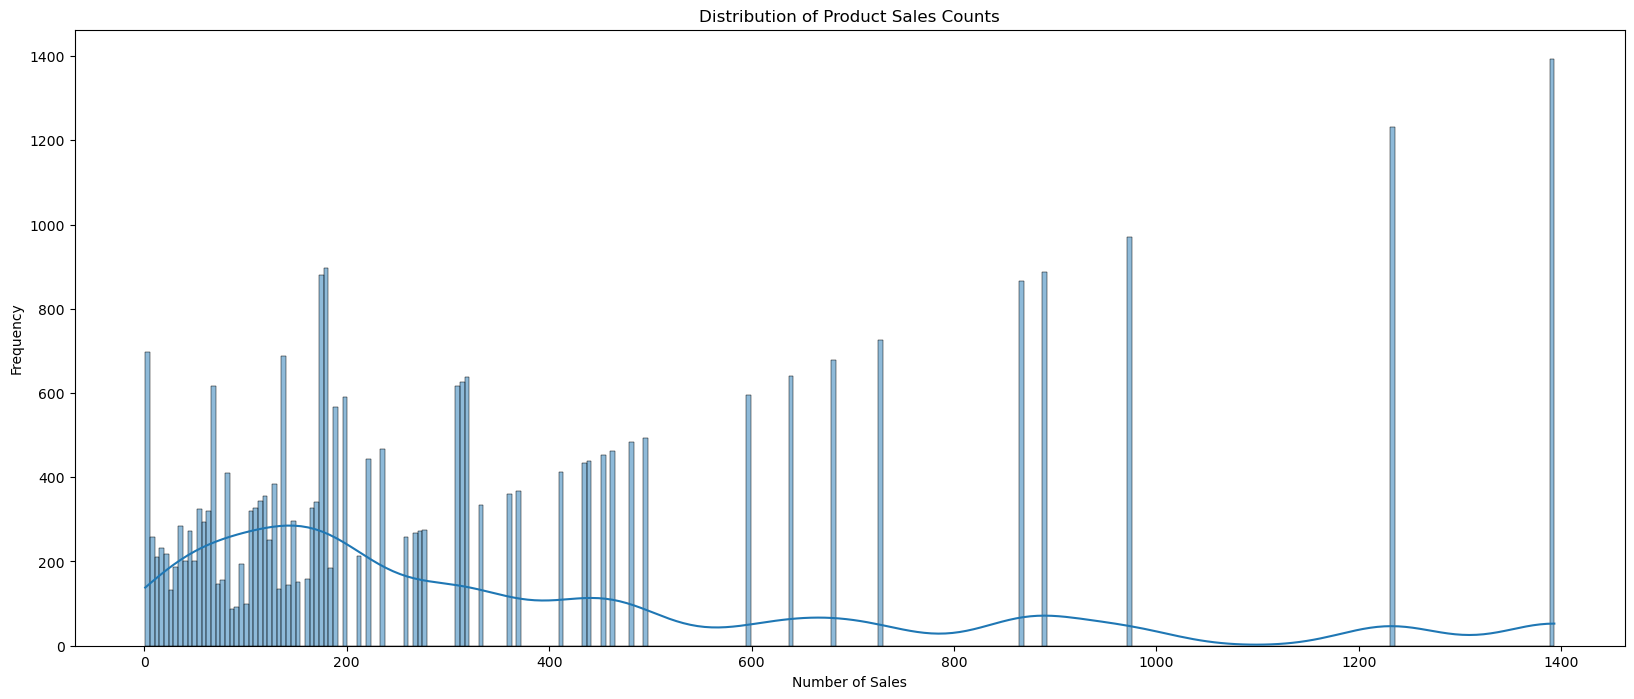

In [280]:
 # Plot the distribution of sales counts
plt.figure(figsize=(20, 8))
sns.histplot(shopify_combined_df['sales_count'], bins=300, kde=True)
plt.title('Distribution of Product Sales Counts')
plt.xlabel('Number of Sales')
plt.ylabel('Frequency')
plt.show()

A threshold of 50 sales will be used to filter out all those products sold less than 50 times. 

In [281]:
# Define threshold
threshold = 50

# Filter products with sales count above the threshold
shopify_filtered_df = shopify_combined_df[shopify_combined_df['sales_count'] > threshold]

# Save new filtered data frame 
shopify_filtered_df.to_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/shopify_filtered_df.csv', index=False)

# Check the number of products remaining
print(f"Number of products before filtering: {product_sales_count.shape[0]}")
print(f"Number of products after filtering: {shopify_filtered_df['Product'].nunique()}")


Number of products before filtering: 677
Number of products after filtering: 125


#### 1.2.2.2 Shopify Products - Check if null values exist

In [283]:
has_null_shopify = shopify_filtered_df.isnull().values.any()

print("Does the DataFrame have any null values?:", has_null_shopify)

Does the DataFrame have any null values?: True


In [284]:
null_counts_shopify = shopify_filtered_df.isnull().sum()

print("Null values per column in Shopify DataFrame:\n", null_counts_shopify)

Null values per column in Shopify DataFrame:
 Sale ID                  0
Date                     0
Order ID                 0
Order                    0
Product                  0
Net sales                0
Payment type            76
Credit card           5992
Credit card type      5992
Billing country        224
Refunds                 76
Net payments            76
returned_item_rate       0
product_type          3289
sales_count              0
dtype: int64


#### 1.2.2.3 Shopify Products - Explore null values and handle them

- Payment type

All payment types that are null seem to not have any 'Net Payment' information, so they will be filtered out from the data frame. 

In [285]:
shopify_filtered_df[shopify_filtered_df['Payment type'].isnull()].head()


,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type,sales_count
1104,13194638196876,2022-06-30T10:40:53-04:00,4117120712844,#19702,baked fruit tart,13.50,NaN,NaN,NaN,NaN,NaN,NaN,0.02238,Dessert,275
1105,13194637803660,2022-06-30T10:40:53-04:00,4117120712844,#19702,creamy tomato soup,12.00,NaN,NaN,NaN,NaN,NaN,NaN,0.10156,Savoury,98
1106,13194638000268,2022-06-30T10:40:53-04:00,4117120712844,#19702,buttertarts,22.50,NaN,NaN,NaN,NaN,NaN,NaN,0.02301,pastry,368
1107,13194638098572,2022-06-30T10:40:53-04:00,4117120712844,#19702,crostini,7.95,NaN,NaN,NaN,NaN,NaN,NaN,0.02013,Bread,189
1108,13194638098572,2022-06-30T10:40:53-04:00,4117120712844,#19702,crostini,7.95,NaN,NaN,NaN,NaN,NaN,NaN,0.02013,NaN,189


In [286]:
shopify_cleaned_df = shopify_filtered_df.dropna(subset='Payment type')
shopify_cleaned_df.isnull().sum()

Sale ID                  0
Date                     0
Order ID                 0
Order                    0
Product                  0
Net sales                0
Payment type             0
Credit card           5916
Credit card type      5916
Billing country        148
Refunds                  0
Net payments             0
returned_item_rate       0
product_type          3275
sales_count              0
dtype: int64

- Credit card and Credit card type

It seems that all the 'Credit card' and 'Credit card type' rows where 'Payment type' is 'Manual' or 'PayPal Payments Standard' are NaN. I will transformed these to 'Manual' or 'Paypal'.



In [287]:
shopify_cleaned_df[shopify_cleaned_df['Credit card'].isnull()]['Payment type'].value_counts()


Payment type
Manual                      3512
PayPal Payments Standard    2404
Name: count, dtype: int64

In [288]:
# Define function to fill NaN values in the Credit card and Credit card type. 
def fill_credit_info(row):
    if pd.isnull(row['Credit card']):
        if row['Payment type'] == 'Manual':
            row['Credit card'] = 'Manual'
        elif row['Payment type'] == 'PayPal Payments Standard':
            row['Credit card'] = 'PayPal'
    
    if pd.isnull(row['Credit card type']):
        if row['Payment type'] == 'Manual':
            row['Credit card type'] = 'Manual'
        elif row['Payment type'] == 'PayPal Payments Standard':
            row['Credit card type'] = 'PayPal'

    return row

# Apply function to each row
shopify_cleaned_df = shopify_cleaned_df.apply(fill_credit_info, axis=1)

shopify_cleaned_df[['Payment type', 'Credit card', 'Credit card type']].head(10)

,Payment type,Credit card,Credit card type
0,Shopify Payments,Mastercard,Standard
1,Shopify Payments,Mastercard,Standard
2,Shopify Payments,Mastercard,Standard
3,Shopify Payments,Mastercard,Standard
4,Shopify Payments,Mastercard,Standard
5,Shopify Payments,Mastercard,Standard
6,Manual,Manual,Manual
7,PayPal Payments Standard,PayPal,PayPal
8,Shopify Payments,Mastercard,Standard
9,Manual,Manual,Manual


In [289]:
shopify_cleaned_df.isnull().sum()

Sale ID                  0
Date                     0
Order ID                 0
Order                    0
Product                  0
Net sales                0
Payment type             0
Credit card              0
Credit card type         0
Billing country        148
Refunds                  0
Net payments             0
returned_item_rate       0
product_type          3275
sales_count              0
dtype: int64

- Billing country

The billing country with most sales is 'Canada', and the only bakery is located in Canada, so we will assume the billing country is Canada for all NaN values in the 'Billing country' column.

In [290]:
shopify_cleaned_df['Billing country'].value_counts()

Billing country
Canada                  25989
United States             261
United Kingdom             38
Switzerland                 9
Thailand                    4
Singapore                   3
India                       3
Bermuda                     2
Ireland                     2
Cayman Islands              1
Saudi Arabia                1
Ghana                       1
South Africa                1
United Arab Emirates        1
Ukraine                     1
Name: count, dtype: int64

In [291]:
shopify_cleaned_df.fillna({'Billing country':'Canada'}, inplace=True)
shopify_cleaned_df['Billing country'] = shopify_cleaned_df['Billing country'].fillna('Canada')
shopify_cleaned_df.isnull().sum()

Sale ID                  0
Date                     0
Order ID                 0
Order                    0
Product                  0
Net sales                0
Payment type             0
Credit card              0
Credit card type         0
Billing country          0
Refunds                  0
Net payments             0
returned_item_rate       0
product_type          3275
sales_count              0
dtype: int64

- Product type

All product types will be substituted depending on the product name and the unique values in the 'product_type' column. 

In [292]:
shopify_cleaned_df['product_type'].value_counts().sort_index(ascending=True)

product_type
Bread           2102
Breakfast        593
Cakes           6453
Catering        1233
Cookies         2560
Dessert          766
Easter            95
Fathers           27
Gourmet          210
Holiday          165
Savoury         2241
Squares          327
breakfast         49
cake             257
fathers            8
holiday          295
loaf             254
muffin           232
pastry           543
pie             3240
savoury          787
scones           407
thanksgiving     165
valentines       181
Name: count, dtype: int64

Condensing product types

In [293]:
# Convert all product types to lowercase
shopify_cleaned_df['product_type'] = shopify_cleaned_df['product_type'].str.lower()

# Get the value counts of 'product_type' and sort them alphabetically by the product type names
product_type_counts = shopify_cleaned_df['product_type'].value_counts().sort_index(ascending=True)

print(product_type_counts)
print('\n', shopify_cleaned_df['product_type'].nunique())


product_type
bread           2102
breakfast        642
cake             257
cakes           6453
catering        1233
cookies         2560
dessert          766
easter            95
fathers           35
gourmet          210
holiday          460
loaf             254
muffin           232
pastry           543
pie             3240
savoury         3028
scones           407
squares          327
thanksgiving     165
valentines       181
Name: count, dtype: int64

 20


In [295]:
# Define the mapping dictionary
product_type_mapping = {
    'cake': 'cakes',
    'cakes': 'cakes'
}

# Map 'cake' and 'cakes' to 'cakes', and leave other types unchanged
shopify_cleaned_df['product_type'] = shopify_cleaned_df['product_type'].map(product_type_mapping).fillna(shopify_cleaned_df['product_type'])

print(shopify_cleaned_df['product_type'].value_counts().sort_index(ascending=True))
print('\n', shopify_cleaned_df['product_type'].nunique())

product_type
bread           2102
breakfast        642
cakes           6710
catering        1233
cookies         2560
dessert          766
easter            95
fathers           35
gourmet          210
holiday          460
loaf             254
muffin           232
pastry           543
pie             3240
savoury         3028
scones           407
squares          327
thanksgiving     165
valentines       181
Name: count, dtype: int64

 19


Product type mapping

The following code will attempt to obtain the name of all those products that are included under the different product type classifications. Then, the rest of the products without a product type can be mapped to their respective product type depending on the name of the product. 

In [296]:
# Define the function to get unique products for each product type
def get_unique_products_by_type(shopify_cleaned_df):
    # Get unique product types
    product_types = shopify_cleaned_df['product_type'].unique()
    
    # Initialize a dictionary to store the results
    unique_products_by_type = {}
    
    # Iterate over each product type
    for product_type in product_types:
        # Filter the DataFrame by the current product type
        filtered_df = shopify_cleaned_df[shopify_cleaned_df['product_type'] == product_type]
        
        # Get unique products for the current product type
        unique_products = filtered_df['Product'].unique().tolist()
        
        # Store the result in the dictionary
        unique_products_by_type[product_type] = unique_products
    
    return unique_products_by_type

# Apply the function to your DataFrame
unique_products_by_type = get_unique_products_by_type(shopify_cleaned_df)

# Print the results
for product_type, products in unique_products_by_type.items():
    print(f"Product Type: {product_type}")
    print(f"Unique Products: {products}\n")


Product Type: pastry
Unique Products: ['buttertarts', '6 mincemeat tarts']

Product Type: dessert
Unique Products: ['baked fruit tart', 'guinness  ginger cake', '2 iced shortbread', '6 sprinkle shortbread', 'mini dessert box for mom']

Product Type: breakfast
Unique Products: ['breakfast pastry platter', '6 blueberry lemon buns', '6 croissants', 'granola', '6 hot cross buns', 'breakfast pastry selection']

Product Type: catering
Unique Products: ['sandwich platter', 'cheese platter', 'fruit platter', 'crudit platter', '24 piece square tray', 'lunch box  individual', 'brunch box  individual']

Product Type: cookies
Unique Products: ['cookie trays  individually wrapped', 'chocolate chip cookie cake', '6 peanut butter cookies', '6 oatmeal raisin cookies', '6 oatmeal chocolate chip cookies', 'baked goods gift box', '6 macarons', '6 sprinkle shortbread', '6 ginger molasses cookies', '6 chocolate chunk cookies', '6 hermit cookies', 'scottish shortbread', 'assorted holiday cookies', '2 lb fru

In [297]:
# Map the products with their corresponding product type. 

# Define keywords for each product type
keyword_mapping = {
    'pies': ['pie', 'crumble', 'cream', 'lemon meringue', 'baked fruit tart', 'fruit tart'],
    'cakes': ['cake', 'cheesecake', 'cupcakes', 'buttercake', 'slab', 'yule'],
    'cookies': ['cookie', 'macaron', 'shortbread', 'cookies', 'macarons', 'gingerbread', 'linzer', 'linzers'],
    'bread': ['bread', 'crostini', 'croutons', 'pizza dough', 'italian bread', 'multigrain sourdough', 'crostini', 'challah', 'sourdough bread', 'whole wheat bread', '4 kaisers', 'pulla bread', 'white bread', '12 dinner rolls', '6 dinner rolls', 'dinner rolls', 'bagels'],
    'scones': ['scone', 'scones', 'biscuit', '6 white chocolate cranberry scones', '6 buttermilk biscuits', '6 cheddar  herb scones', '6 raisin scones', '6 pecan citrus scones', 'buttermilk', 'biscuits'],
    'muffin': ['muffin', 'muffins', '6 carrot ginger pecan muffins', '6 blueberry cranberry bran muffins', '6 banana chocolate chunk muffins'],
    'squares': ['square', 'brownie', '6 brownies', '6 lemon squares', 'brownie cobbler slabs', 'squares', 'cobblers', ],
    'loaf': ['loaf', 'banana bread', 'lemon poppyseed loaf', 'loaves', 'apple raisin walnut loaf'],
    'holiday': ['holiday', 'plum', 'rum', 'fruitcake', 'holiday cookies', 'cranberry compote'],
    'breakfast': ['granola', 'blueberry lemon buns', 'croissant', 'croissants', 'chocolate croissants', 'chocolate croissant', 'cinnamon'],
    'catering': ['breakfast pastry selection', '24 piece square tray', 'breakfast pastry platter', 'platter', 'box', 'tray', 'trays', 'gift', 'lunch box', 'brunch box', 'charcuterie board', 'appetizer platter', 'cookie trays  individually wrapped', 'cookie tray'],
    'pastry': ['buttertart', 'buttertarts', 'mincemeat', 'bread pudding', 'guinness  ginger cake', 'guinnes cake'],
    'savoury': ['caramelized onion', 'gruyere tarts', 'mushroom wellington', 'turkey gravy', 'quiche', 'soup', 'beef pie', 'dip', 'dips', 'rolls', 'mac  cheese', 'chicken pot pie', 'shepherds pie', 'tourtiere', 'warm spinach  artichoke dip', 'roasted red pepper  goat cheese dip', 'sausage rolls  1 dozen', 'caramelized onion  gruyere tarts  1 dozen', 'butternut squash bisque', '500 ml potato leek soup', 'crostini'],
    'delivery': ['delivery fee', 'delivery', 'deliver', 'delivery charge'],
    'gourmet': ['new years eve 5 course dinner for 2', 'new years eve 5 course dinner for 2', 'will you be my valentine treat box', 'thanksgiving dinner for 2', 'st patricks day three course dinner for two', 'new years eve 5 course dinner for 2', 'new years eve 5 course dinner for 2', 'new years eve 5 course dinner for 2']
}

# Create function to map product names to product types
def map_product_type(product, keyword_mapping): 
    product = product.lower()
    for product_type, keywords in keyword_mapping.items():
        for keyword in keywords:
            if keyword in product:
                return product_type
    return 'unknown' 

# Apply the mapping function to products without a type
shopify_cleaned_df['product_type'] = shopify_cleaned_df.apply(
    lambda row: map_product_type(row['Product'], keyword_mapping) if pd.isnull(row['product_type']) else row['product_type'],
    axis = 1
)

shopify_cleaned_df.head(50)

,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type,sales_count
0,13087920095372,2022-06-01T05:55:27-04:00,4089814286476,#19176,buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry,368
1,13087920160908,2022-06-01T05:55:27-04:00,4089814286476,#19176,buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry,368
2,13087920193676,2022-06-01T05:55:27-04:00,4089814286476,#19176,baked fruit tart,20.95,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,dessert,275
3,13087920029836,2022-06-01T05:55:27-04:00,4089814286476,#19176,baked fruit tart,13.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,dessert,275
4,13087920062604,2022-06-01T05:55:27-04:00,4089814286476,#19176,breakfast pastry platter,40.00,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.00724,breakfast,119
5,13087920128140,2022-06-01T05:55:27-04:00,4089814286476,#19176,buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry,368
6,13088180994188,2022-06-01T08:08:35-04:00,4089902530700,#19177,sandwich platter,152.00,Manual,Manual,Manual,Canada,0.0,171.76,0.07236,catering,272
7,13088418070668,2022-06-01T08:57:25-04:00,4089942933644,#19178,cookie trays individually wrapped,56.00,PayPal Payments Standard,PayPal,PayPal,Canada,0.0,63.28,0.02380,cookies,176
8,13088634470540,2022-06-01T09:24:44-04:00,4089973964940,#19179,chocolate buttercake,24.00,Shopify Payments,Mastercard,Standard,Canada,0.0,24.00,0.02100,cakes,595
9,13088779862156,2022-06-01T09:57:28-04:00,4089998246028,#19180,apple raisin walnut loaf,15.95,Manual,Manual,Manual,Canada,0.0,15.95,0.00000,loaf,68


Check if there are any null values in 'product_type'.

In [298]:
shopify_cleaned_df.isnull().sum()

Sale ID               0
Date                  0
Order ID              0
Order                 0
Product               0
Net sales             0
Payment type          0
Credit card           0
Credit card type      0
Billing country       0
Refunds               0
Net payments          0
returned_item_rate    0
product_type          0
sales_count           0
dtype: int64

Check data types

It seems like the only data type we need to fix is the `Date` column. Which should be a date type. 

In [299]:
shopify_cleaned_df.dtypes

Sale ID                 int64
Date                   object
Order ID                int64
Order                  object
Product                object
Net sales             float64
Payment type           object
Credit card            object
Credit card type       object
Billing country        object
Refunds               float64
Net payments          float64
returned_item_rate    float64
product_type           object
sales_count             int64
dtype: object

In [300]:
shopify_cleaned_df['Date'] = pd.to_datetime(shopify_cleaned_df['Date'], utc=True)
shopify_cleaned_df.dtypes


Sale ID                             int64
Date                  datetime64[ns, UTC]
Order ID                            int64
Order                              object
Product                            object
Net sales                         float64
Payment type                       object
Credit card                        object
Credit card type                   object
Billing country                    object
Refunds                           float64
Net payments                      float64
returned_item_rate                float64
product_type                       object
sales_count                         int64
dtype: object

**Descriptive Statistics - Shopify Products**

1. `Sale ID` and `Order ID` are simply order numbers, so no further analysis is required for these columns.
   
2. `Net Sales` indicates the presence of refunds, as the minimum value is -$367, which likely represents a refund. The maximum value reaches up to $1,792 per transaction. Due to this high sale amount, the mean is larger than the median. However, the median, which is $24, is more representative of the typical distribution of Net Sales.
   
3. `Refunds` predominantly consist of zeros, as reflected in the interquartile range (all zeros). The only non-zero value is the minimum, which is -$639. The maximum value is expected to be $0, indicating no refund was issued. There are over 1,300 refunds. 
   
4. `Net Payments` behaves similarly to the `Net Sales` column. However, due to taxes, the values are slightly higher, with the maximum reaching $2,309. This skews the mean higher than the median, which are $80 and $58, respectively. The minimum value aligns with that of `Net Sales`.
   
5. `Returned Item Rate` represents how often a product is returned after an order is placed. The values range from 0 to 1, as expected.
   
6. `Sales Count` represents the number of times a particular product has been sold. For instance, butter tarts have been sold 51 times in different transactions. The difference between the mean and median suggests that the maximum value might be an outlier or that a specific product sells exceptionally well.


In [301]:
shopify_cleaned_df.describe().select_dtypes(include=['number'])

,Sale ID,Order ID,Net sales,Refunds,Net payments,returned_item_rate,sales_count
count,2.646500e+04,2.646500e+04,26465.000000,26465.000000,26465.000000,26465.00000,26465.000000
mean,1.465646e+13,4.484437e+12,29.933444,-3.257894,80.714039,0.03289,452.129756
std,8.151803e+11,2.147742e+11,37.367631,25.475190,106.029856,0.06118,383.181844
min,1.308792e+13,4.075329e+12,-367.200000,-639.820000,-639.820000,0.00000,51.000000
25%,1.409510e+13,4.317136e+12,15.950000,0.000000,35.000000,0.01652,164.000000
50%,1.466578e+13,4.479833e+12,24.500000,0.000000,58.900000,0.02352,313.000000
75%,1.540096e+13,4.674718e+12,40.000000,0.000000,101.030000,0.04102,679.000000
max,1.601053e+13,4.887249e+12,1792.000000,0.000000,2309.720000,1.00000,1393.000000


In [302]:
shopify_cleaned_df[shopify_cleaned_df['Net payments'] < 0].shape


(1338, 15)

**Exploring the Minimum Value in `Refunds`**

When examining transactions with refunds greater than $600, we found that only one order (#23749) met this criterion. This order involved a large quantity of cupcakes, and one cake, intended for delivery. Because this single order significantly skews the data to the left, it will be excluded from the analysis. It's important to note that this high refund originated from the cakes and delivery department.

In [303]:
shopify_cleaned_df[shopify_cleaned_df['Refunds']<= -600]

,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type,sales_count
11039,14296611324044,2023-02-04 18:48:35+00:00,4380446457996,#23749,6 cupcakes,216.0,Manual,Manual,Manual,Canada,-639.82,-639.82,1.00000,cakes,971
11041,14296611291276,2023-02-04 18:48:35+00:00,4380446457996,#23749,6 cupcakes,180.0,Manual,Manual,Manual,Canada,-639.82,-639.82,0.05241,cakes,971
11045,14296611192972,2023-02-04 18:48:35+00:00,4380446457996,#23749,delivery charge,11.0,Manual,Manual,Manual,Canada,-639.82,-639.82,0.01538,delivery,172
11047,14296611258508,2023-02-04 18:48:35+00:00,4380446457996,#23749,6 cupcakes,180.0,Manual,Manual,Manual,Canada,-639.82,-639.82,0.05241,cakes,971
11049,14296611225740,2023-02-04 18:48:35+00:00,4380446457996,#23749,vanilla buttercake,48.0,Manual,Manual,Manual,Canada,-639.82,-639.82,0.04600,cakes,1231
14751,14683098873996,2023-05-23 15:17:12+00:00,4380446457996,#23749,delivery charge,-11.0,Manual,Manual,Manual,Canada,-639.82,-639.82,0.01538,delivery,172
14753,14683098906764,2023-05-23 15:17:12+00:00,4380446457996,#23749,vanilla buttercake,-48.0,Manual,Manual,Manual,Canada,-639.82,-639.82,0.04600,cakes,1231
14757,14683098939532,2023-05-23 15:17:12+00:00,4380446457996,#23749,6 cupcakes,-180.0,Manual,Manual,Manual,Canada,-639.82,-639.82,0.05241,cakes,971
14759,14683099037836,2023-05-23 15:17:12+00:00,4380446457996,#23749,6 cupcakes,-216.0,Manual,Manual,Manual,Canada,-639.82,-639.82,1.00000,cakes,971
14761,14683098972300,2023-05-23 15:17:12+00:00,4380446457996,#23749,6 cupcakes,-180.0,Manual,Manual,Manual,Canada,-639.82,-639.82,0.05241,cakes,971


In [304]:
# Drop order #23749
shopify_cleaned_df = shopify_cleaned_df[shopify_cleaned_df['Order'] != '#23749']


**Exploring `Refunds` Over $300**

Upon examining orders with refunds exceeding $300, we found that only one or two orders were involved, primarily for catering items. Since this represents a very small subset, these orders will also be excluded from the analysis.

In [305]:
shopify_cleaned_df[shopify_cleaned_df['Refunds']<= -300]

,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type,sales_count
749,13164873154700,2022-06-18 18:12:47+00:00,4107360305292,#19529,breakfast pastry platter,40.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.00724,breakfast,119
751,13164873089164,2022-06-18 18:12:47+00:00,4107360305292,#19529,brunch box individual,70.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.09356,catering,56
753,13164873220236,2022-06-18 18:12:47+00:00,4107360305292,#19529,charcuterie board,15.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.04046,savoury,188
755,13164873121932,2022-06-18 18:12:47+00:00,4107360305292,#19529,brunch box individual,70.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.09356,catering,56
757,13164873056396,2022-06-18 18:12:47+00:00,4107360305292,#19529,brunch box individual,56.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.09356,catering,56
759,13164873187468,2022-06-18 18:12:47+00:00,4107360305292,#19529,fruit platter,33.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.07428,catering,177
837,13174217736332,2022-06-22 17:48:16+00:00,4107360305292,#19529,breakfast pastry platter,-40.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.00724,breakfast,119
839,13174217670796,2022-06-22 17:48:16+00:00,4107360305292,#19529,brunch box individual,-70.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.09356,catering,56
841,13174217801868,2022-06-22 17:48:16+00:00,4107360305292,#19529,charcuterie board,-15.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.04046,savoury,188
843,13174217638028,2022-06-22 17:48:16+00:00,4107360305292,#19529,brunch box individual,-56.00,Shopify Payments,Mastercard,Standard,Canada,-318.97,-318.97,0.09356,catering,56


In [306]:
# Drop orders #20992, #21705, #19529
shopify_cleaned_df = shopify_cleaned_df[~shopify_cleaned_df['Order'].isin(['#20992', '#21705', '#19529'])]

**Exploring Maximum `Net Sales` Values**

There are only three transactions with `Net Sales` exceeding $600, and they significantly skew the data to the right, causing the distribution to have a long tail on the x-axis. Due to this skew, these transactions will be excluded from further analysis.

It's important to note that the products sold in these transactions primarily come from the catering department.

In [307]:
shopify_cleaned_df = shopify_cleaned_df[shopify_cleaned_df['Net sales']<600]

In [308]:
# Save the final data frame. 
shopify_cleaned_df.to_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Shopify Products for Analysis.csv', index = False)

The Shopify Products data frame is ready for analysis in Notebook 2.
__________________________

## 1.3 Visualization

Create functions for graphs.

In [309]:
def plot_distribution(ax, df, column):
    if column in df.columns:
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        print(f"Column {column} not found in DataFrame")

def plot_scatterplot(ax, df, x_feature, y_feature, hue_feature):
    if x_feature in df.columns and y_feature in df.columns and hue_feature in df.columns:
        sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df[hue_feature], ax=ax)
        ax.set_title(f'{x_feature} vs {y_feature} colored by {hue_feature}')
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
    else:
        missing_features = [feature for feature in [x_feature, y_feature, hue_feature] if feature not in df.columns]
        print(f"Feature(s) {', '.join(missing_features)} not found in DataFrame")

def plot_boxplot(ax, df, column):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

def plot_time_series(ax, df, date_column, value_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df_monthly = df.resample('ME', on=date_column)[value_column].sum()  # Resample by month and sum the sales
    sns.lineplot(x=df_monthly.index, y=df_monthly, ax=ax)
    ax.set_title(f'{value_column} Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel(value_column)
    ax.set_xticks(df_monthly.index)  # Ensures all months are shown on the x-axis
    ax.set_xticklabels(df_monthly.index.strftime('%b %Y'), rotation=45)

def plot_monthly_net_sales_barplot(ax, df, date_column, value_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df_monthly = df.resample('ME', on=date_column)[value_column].sum()  # Resample by month and sum the sales

    sns.barplot(x=df_monthly.index.strftime('%b %Y'), y=df_monthly, ax=ax)
    ax.set_title('Total Net Sales per Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(value_column)
    
    # Set the ticks and labels explicitly
    ax.set_xticks(range(len(df_monthly.index)))
    ax.set_xticklabels(df_monthly.index.strftime('%b %Y'), rotation=45)

def plot_heatmap(ax, df, date_column, hour_column, value_column):
    df['Day'] = pd.to_datetime(df[date_column]).dt.day_name()
    df['Hour'] = df[hour_column]
    pivot_table = df.pivot_table(index='Day', columns='Hour', values=value_column, aggfunc='sum')
    sns.heatmap(pivot_table, cmap='coolwarm', ax=ax)
    ax.set_title(f'Heatmap of {value_column} by Day and Hour')

def plot_barplot(ax, df, category_column):
    sns.countplot(x=df[category_column], ax=ax)
    ax.set_title(f'Count of {category_column}')
    ax.set_xlabel(category_column)
    ax.set_ylabel('Count')

def plot_correlation_heatmap(ax, df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr = numeric_df.corr()
    
    # Plot the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Correlation Heatmap')

def plot_duration_analysis(ax, df, duration_column, group_by_column):
    sns.boxplot(x=df[group_by_column], y=df[duration_column], ax=ax)
    ax.set_title(f'{duration_column} by {group_by_column}')
    ax.set_xlabel(group_by_column)
    ax.set_ylabel(duration_column)

def plot_performance_comparison(ax, df, value_column, performance_column):
    sns.boxplot(x=df[performance_column], y=df[value_column], ax=ax)
    ax.set_title(f'{value_column} by {performance_column}')
    ax.set_xlabel(performance_column)
    ax.set_ylabel(value_column)

### 1.3.1 Revel Visualization 

In [310]:
revel_combined_df = pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Revel for Analysis.csv', index_col=0)
revel_combined_df.head()

,Reporting No,Order No,Created By,First Opened,Last Closed,Net Sales,Tax,Final Total,Transaction Duration,Hour,Date,Transactions per Hour,Created By Label,High Performance
0,652038,1417308,"Ellerbeck, Lindsay",2024-05-31 17:03:29,2024-05-31 17:04:01,42.45,0.78,43.23,32.0,17,2024-05-31,1,10,False
1,652037,1417305,"Ellerbeck, Lindsay",2024-05-31 16:59:59,2024-05-31 17:00:41,14.00,1.82,15.82,42.0,16,2024-05-31,29,10,False
2,652036,1417304,"Velazquez, Itzel",2024-05-31 16:59:43,2024-05-31 17:00:46,33.45,0.98,34.43,63.0,16,2024-05-31,29,29,False
3,652035,1417301,"Ellerbeck, Lindsay",2024-05-31 16:57:13,2024-05-31 16:59:04,19.25,2.50,21.75,111.0,16,2024-05-31,29,10,False
4,652034,1417299,"Velazquez, Itzel",2024-05-31 16:56:23,2024-05-31 16:56:54,47.95,0.78,48.73,31.0,16,2024-05-31,29,29,False


In [230]:
revel_combined_df.dtypes

Reporting No               int64
Order No                   int64
Created By                object
First Opened              object
Last Closed               object
Net Sales                float64
Tax                      float64
Final Total              float64
Transaction Duration     float64
Hour                       int64
Date                      object
Transactions per Hour      int64
Created By Label           int64
High Performance            bool
dtype: object

In [231]:
revel_combined_df['Date'] = pd.to_datetime(revel_combined_df['Date'])
revel_combined_df['First Opened'] = pd.to_datetime(revel_combined_df['First Opened'])
revel_combined_df['Last Closed'] = pd.to_datetime(revel_combined_df['Last Closed'])
revel_combined_df.dtypes

Reporting No                      int64
Order No                          int64
Created By                       object
First Opened             datetime64[ns]
Last Closed              datetime64[ns]
Net Sales                       float64
Tax                             float64
Final Total                     float64
Transaction Duration            float64
Hour                              int64
Date                     datetime64[ns]
Transactions per Hour             int64
Created By Label                  int64
High Performance                   bool
dtype: object

- Comprehensive visualization

Here's a revised version of your descriptions with improved flow and grammar:

1. **Distribution of `Net Sales`**  
   Most orders are below $200, with only a few exceeding this amount, reaching up to $1750. The higher values likely correspond to specific high-volume orders.

2. **Scatterplot of `Transactions per Hour` vs `Transaction Duration`, Colored by `High Performance`**  
   This scatterplot shows that, as expected, transactions labeled as 'High Performance' typically have a shorter duration while maintaining a high number of transactions per hour. These transactions also tend to have higher `Net Sales` compared to the average. Conversely, transactions with shorter durations during busy times but lower sales are not considered 'High Performance'.

3. **Boxplot of `Transaction Duration`**  
   Most transactions have a duration of less than 50 seconds. However, there are numerous transactions with durations outside this range, likely representing orders that were closed at the end of the day.

4. **Correlation Heatmap**  
   The heatmap reveals no strong correlations, either positive or negative. The only very weak positive correlations are between `Net Sales` and `Tax`, and between `Final Total` and `Tax`. This indicates that higher `Net Sales` and `Final Total` are associated with higher `Tax`. `Net Sales` and `Final Total` are strongly positively correlated. Other columns, such as `Transaction Number` and `Order Number`, also show a strong correlation, which is expected since they represent similar data.

5. **Time Series Analysis of `Net Sales` Trends**  
   The time series analysis shows significant fluctuations in `Net Sales` throughout the year, with notable peaks at the end of November and mid-December. There is a significant decline by the end of December and the beginning of January.

6. **Total `Net Sales` per Month**  
   This graph highlights that December, March, May, August, and October are the months with the highest `Net Sales`, while January has the lowest.

7. **Heatmap of `Transactions per Hour` by `Day` and `Hour`**  
   The heatmap indicates that the busiest times are Saturdays between 10 am and 12 pm, and Fridays between 10 am and 1 pm. Tuesdays show limited transaction times, aligning with the fact that the bakery is closed every Monday and Tuesday. The heatmap also shows that Wednesdays are busier than other days, particularly between 10 am and 1 pm.


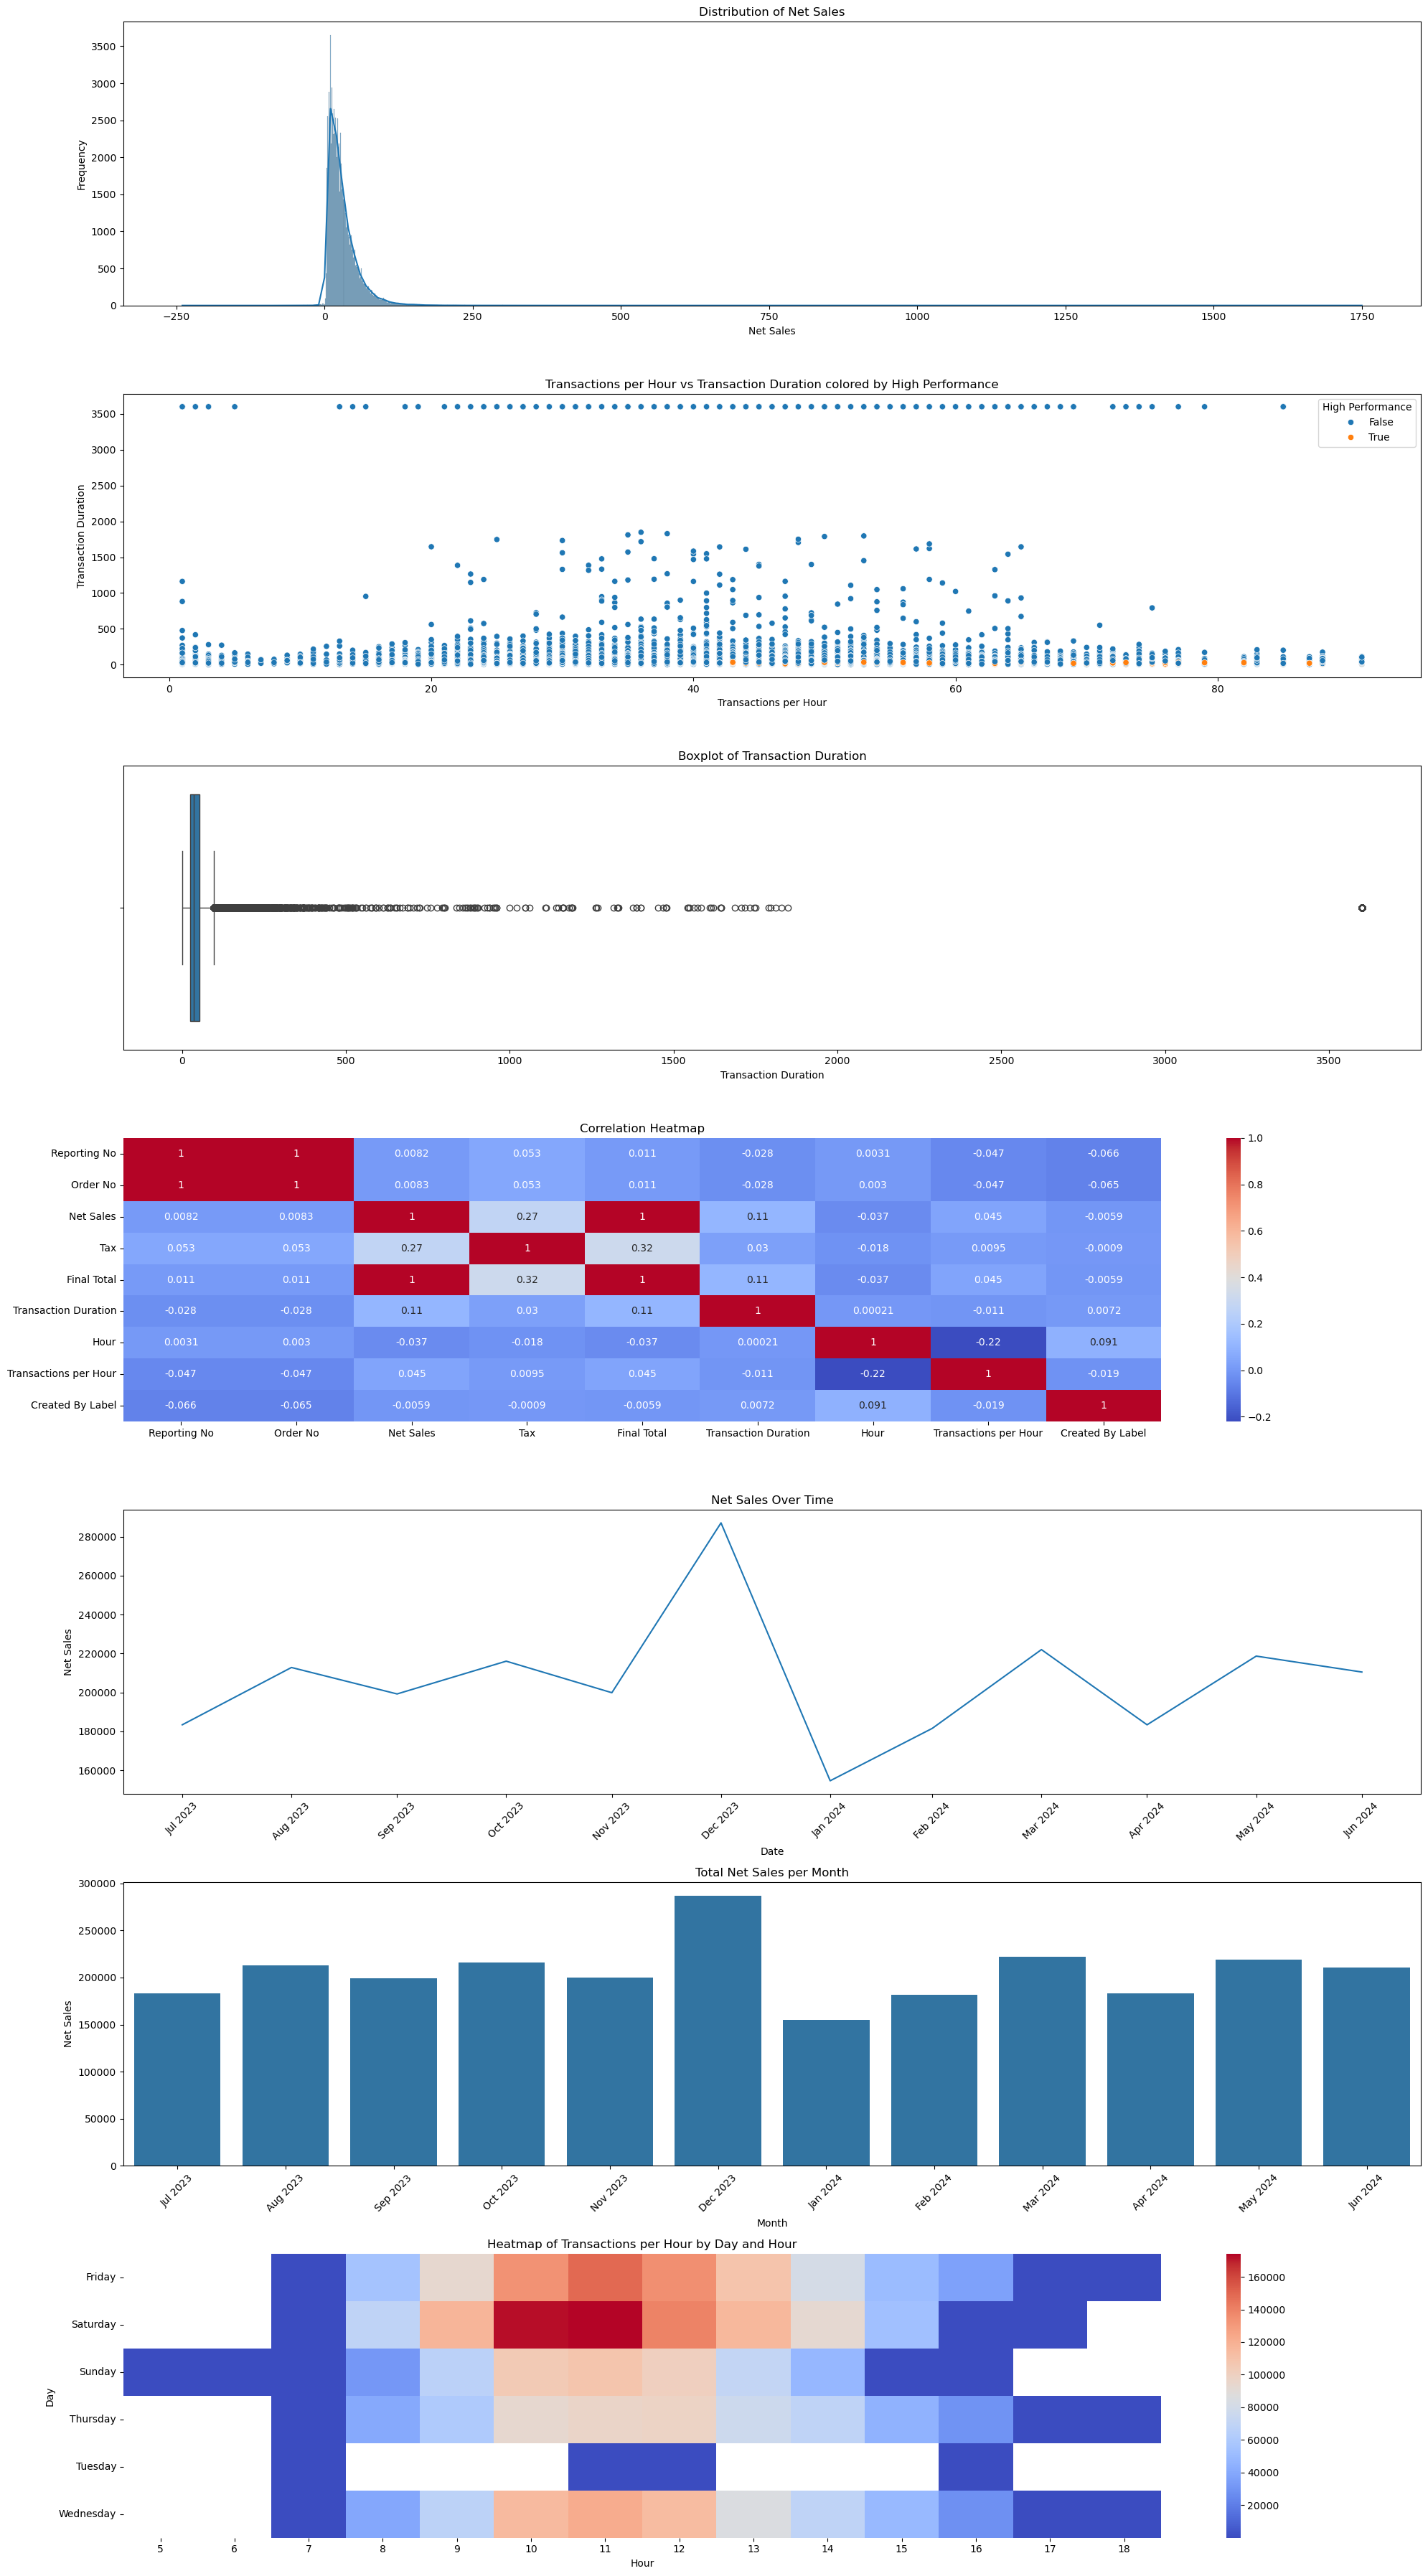

In [232]:
def create_combined_visualizations(df):
    fig, axs = plt.subplots(7, 1, figsize=(20, 36))
    # Distribution plot for 'Net Sales'
    plot_distribution(axs[0], df, 'Net Sales')
    # Scatterplot for 'Net Sales' vs 'Final Total' with hue 'Created By Label'
    plot_scatterplot(axs[1], df, 'Transactions per Hour', 'Transaction Duration', 'High Performance')
    # Boxplot for 'Transaction Duration'
    plot_boxplot(axs[2], df, 'Transaction Duration')
    # Correlation Heatmap for numerical columns
    plot_correlation_heatmap(axs[3], df)
    # Time Series Analysis for 'Net Sales' over 'Date'
    plot_time_series(axs[4], df, 'Date', 'Net Sales')
    # Barplot of Total Net Sales per Month
    plot_monthly_net_sales_barplot(axs[5], df, 'Date', 'Net Sales')
    # Heatmap of 'Transactions per Hour' by Day and Hour
    plot_heatmap(axs[6], df, 'Date', 'Hour', 'Transactions per Hour')
    plt.tight_layout()
    # Save the combined plots
    save_path = '/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Plots/Revel_Combined_Visualizations.png'
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    
create_combined_visualizations(revel_combined_df)

- **Scatterplot: `Transactions per Hour` vs `Transaction Duration` by Employee (`Created By`)**

  In this plot, we can observe each employee's performance, along with their `High Performance Percentage`. This percentage was calculated by comparing the number of their transactions labeled as 'High Performance' to their total number of transactions. Employees with the highest percentages are likely to handle a high volume of transactions throughout the day, including during very busy periods.

  Employees with the highest performance percentages are:
  1. Sydne: 10.2%
  2. Betty: 9.8%
  3. Mahi: 9.6%
  4. Grace: 9.4%
  5. Itzel: 9%
  6. Asia: 8.5%
  7. Stephanie: 8.3%
  8. Emma: 7.9%

/var/folders/z_/3l7r4ptn5pl3mhtr5mj_jy040000gn/T/ipykernel_40921/2241577697.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentages = df_reset.groupby('Created By').apply(lambda x: pd.Series({'High Performance Percentage': calculate_percentage(x)})).reset_index()


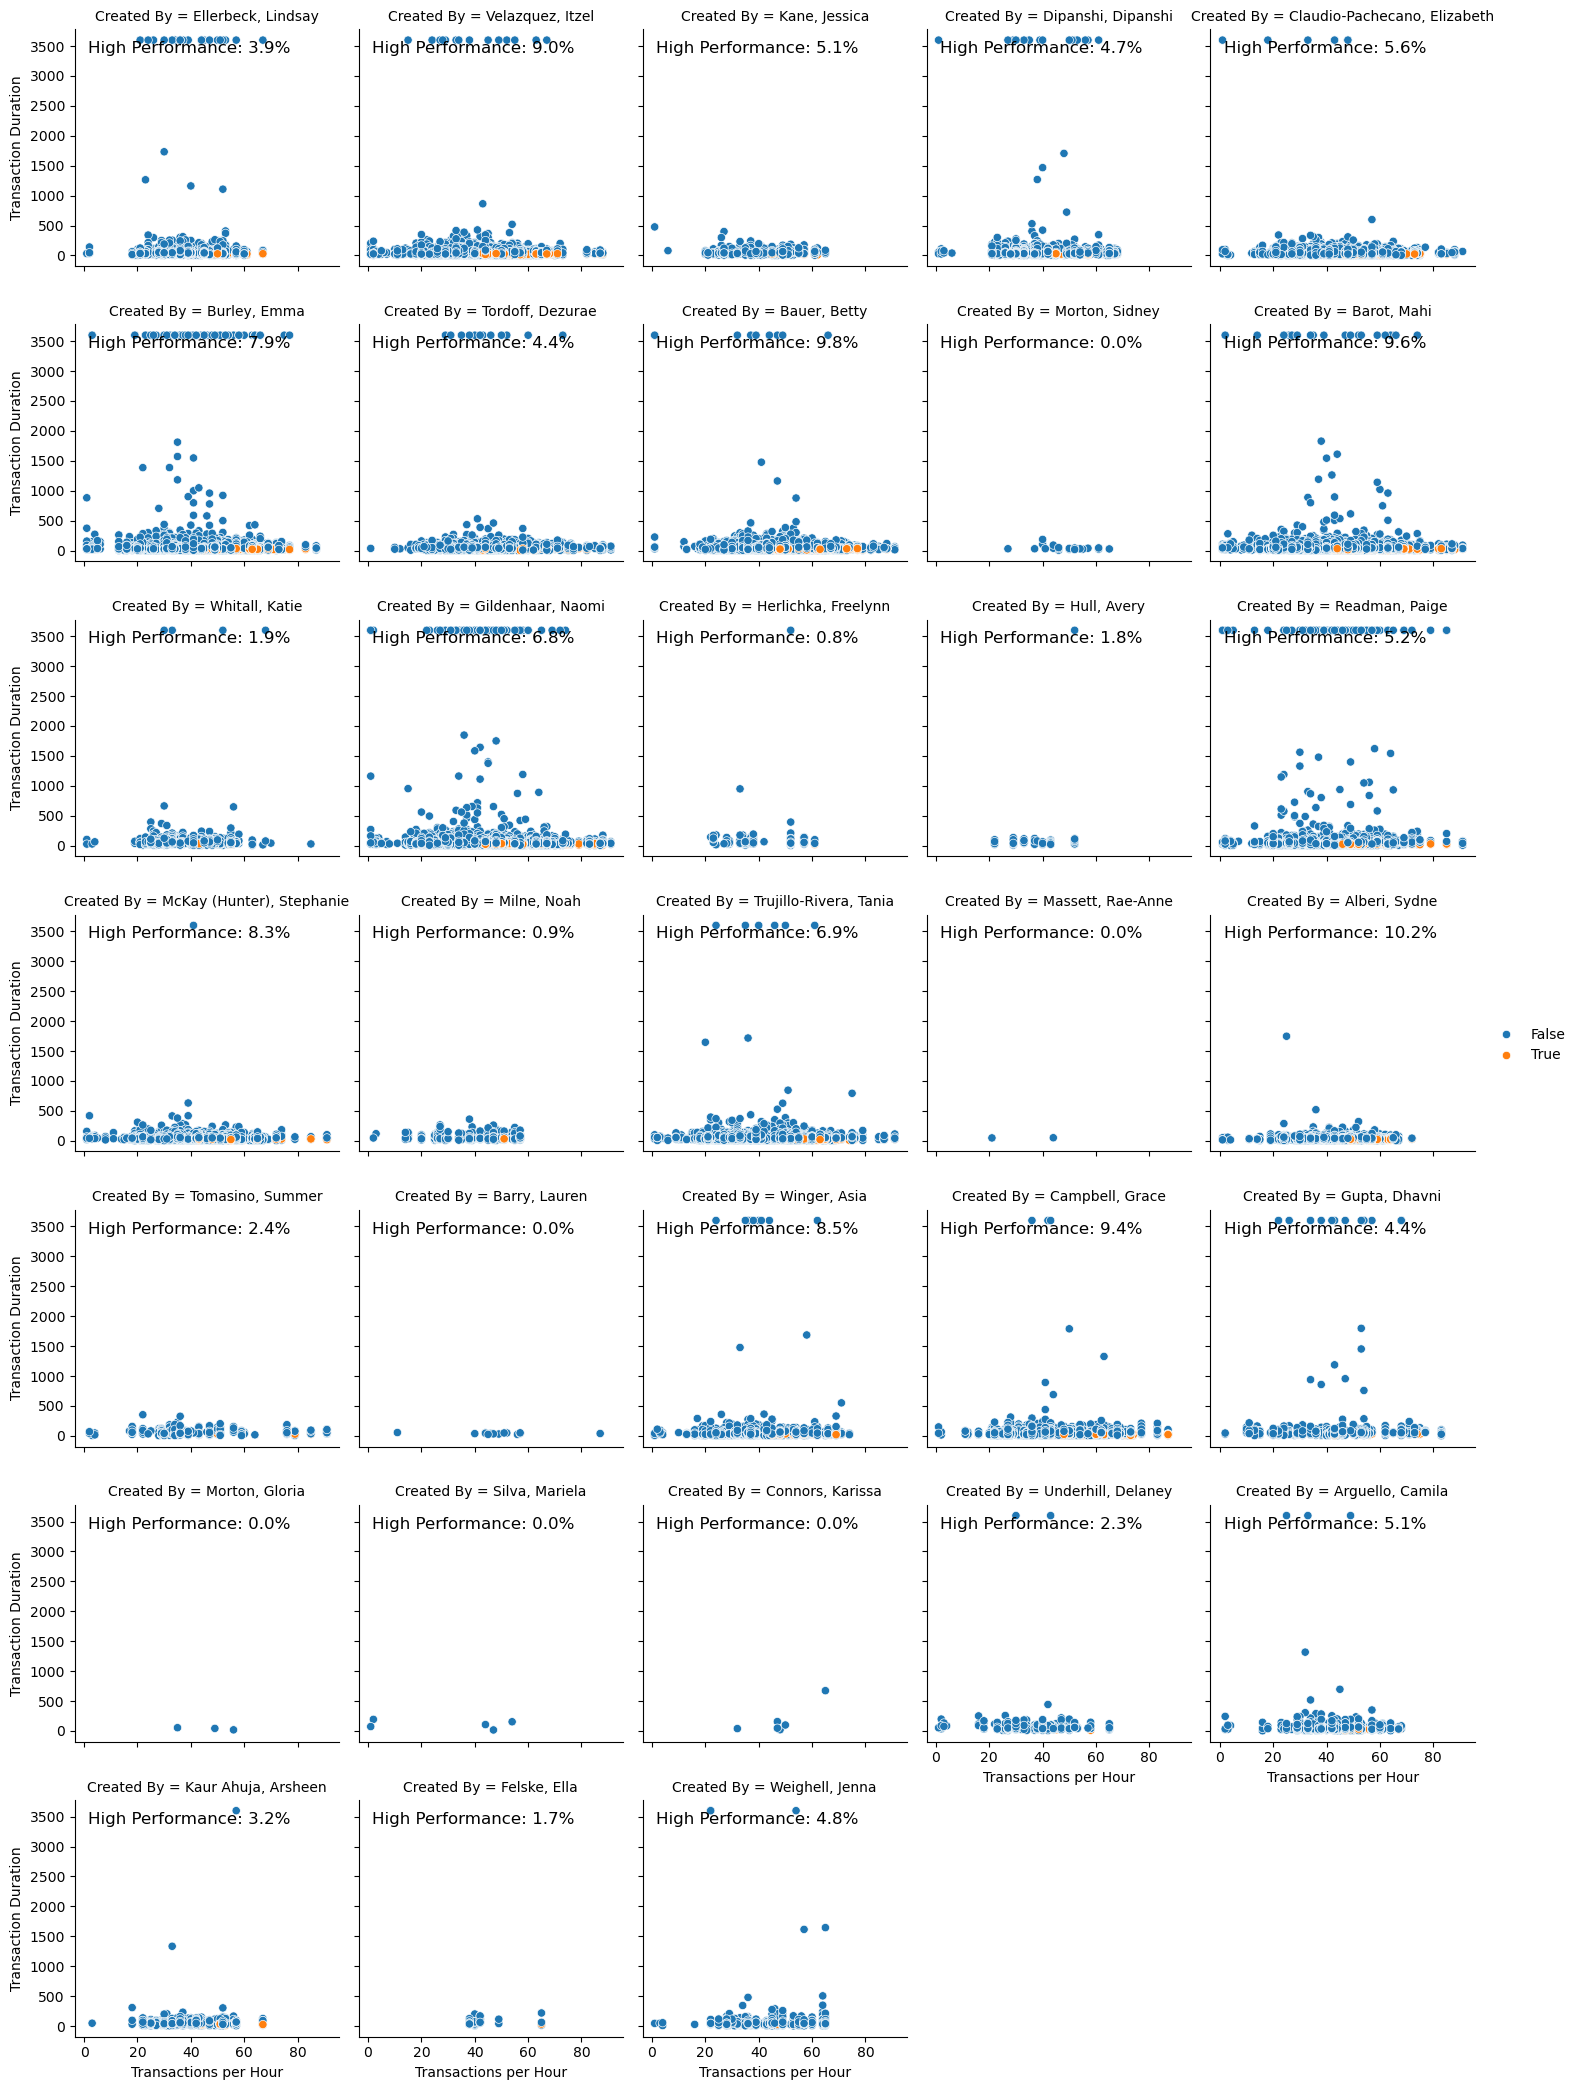

In [233]:
# Define the function to calculate the percentage
def calculate_percentage(group):
    total_transactions = len(group)
    high_performance_transactions = group['High Performance'].sum()
    percentage = (high_performance_transactions / total_transactions) * 100
    return percentage

# Reset index to avoid deprecated behavior
df_reset = revel_combined_df.reset_index(drop=True)

# Group by 'Created By' and calculate the percentage
percentages = df_reset.groupby('Created By').apply(lambda x: pd.Series({'High Performance Percentage': calculate_percentage(x)})).reset_index()

# Create the FacetGrid
g = sns.FacetGrid(revel_combined_df, col='Created By', col_wrap=5)
g.map_dataframe(sns.scatterplot, x='Transactions per Hour', y='Transaction Duration', hue='High Performance')

# Add a legend
g.add_legend()

# Annotate each subplot with the percentage
def annotate_percentage(ax, percentage_df):
    for created_by, percentage in percentage_df.values:
        if created_by in g.axes_dict:
            ax = g.axes_dict[created_by]
            ax.text(0.05, 0.95, f'High Performance: {percentage:.1f}%', 
                    transform=ax.transAxes, fontsize=12, verticalalignment='top')

annotate_percentage(g, percentages)

# Save plot
plot_path = '/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Plots/Scatterplot_Transactions_per_Hour_vs_Transaction_Duration_HP_percentage.png'
plt.savefig(plot_path, bbox_inches='tight')
# Show the plot
plt.show()


### 1.3.2 Shopify Products Visualization

In [311]:
shopify_cleaned_df =pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Shopify Products for Analysis.csv', parse_dates=['Date'])
print(shopify_cleaned_df.dtypes)
shopify_cleaned_df.head()

Sale ID                             int64
Date                  datetime64[ns, UTC]
Order ID                            int64
Order                              object
Product                            object
Net sales                         float64
Payment type                       object
Credit card                        object
Credit card type                   object
Billing country                    object
Refunds                           float64
Net payments                      float64
returned_item_rate                float64
product_type                       object
sales_count                         int64
dtype: object


,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type,sales_count
0,13087920095372,2022-06-01 09:55:27+00:00,4089814286476,#19176,buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry,368
1,13087920160908,2022-06-01 09:55:27+00:00,4089814286476,#19176,buttertarts,22.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02301,pastry,368
2,13087920193676,2022-06-01 09:55:27+00:00,4089814286476,#19176,baked fruit tart,20.95,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,dessert,275
3,13087920029836,2022-06-01 09:55:27+00:00,4089814286476,#19176,baked fruit tart,13.50,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.02238,dessert,275
4,13087920062604,2022-06-01 09:55:27+00:00,4089814286476,#19176,breakfast pastry platter,40.00,Shopify Payments,Mastercard,Standard,Canada,0.0,147.15,0.00724,breakfast,119


- Comprehensive Visualization

For this visualization, the `Refunds` column was filtered to include only rows with values less than $0. Given that the number of transactions that were not refunded is significantly higher than those that resulted in a refund, the plots were skewed, and the visualization did not clearly represent the data.

1. **Distribution Plots: `Net Sales` and `Refunds`**

   These plots show the distribution of net sales and refunds. As expected from our descriptive statistics, most order net sales lie between $20 and $50. The refunds plot indicates that most refunds are below $100, with some exceptions reaching up to $250 (and even up to $600, as noted previously in Section 1.2.2.3 of this notebook).

2. **Scatterplots**
   - **`Net Sales` vs `Sales Count` vs `Product Type`**
     This plot reveals a clustering of data points in the middle of the x-axis (net sales between $0 and $100) and at the bottom of the y-axis (sales count per product lower than 200). Notably, these transactions predominantly involve products from the cakes and cookies departments. It appears that most orders include products from various departments, none of which are sold in large quantities or are part of orders with net sales exceeding $100. The cakes and cookies departments are the only ones with a wide range of net sales and a high volume of sales per type.

   - **`Refunds` vs `Net Sales` vs `Product Type`**
     This plot demonstrates that most refunds are associated with products from the cakes, cookies, and catering departments. We also observe that some transactions, which were partially refunded, appear between $0 and $100 in net sales, but also in the $200 to $250 refund range. Most transactions seem to be fully refunded, as these fully refunded transactions mirror the data points on both the positive and negative sides of the `Net Sales` axis.

   - **`Sales Count` vs `Returned Item Rate` vs `Product Type`**
     This plot shows that products from the cake and pies departments are returned the most, with a return rate of 0.5 to 1 out of 1. Products from the cake department can also have lower return rates, with some products returning at rates below 0.2.

   - **`Refunds` vs `Sales Count` vs `Product Type`**
     Most refunded transactions involve products from various departments, with refunds typically less than $50. Products from the cookies department have a higher sales count and refunds reaching up to $250.

3. **Boxplots: `Net Sales` and `Refunds`**
   These plots illustrate the spread of orders outside the typical distribution of net sales and refunds, making it easier to identify where most transactions fall on the x-axis.

4. **Time Series: `Date` vs `Net Sales` and `Date` vs `Refunds`**
   The net sales plot shows that both 2023 and 2024 experienced peak sales in December, a decline in January, and another peak in April (2023) and March (2024), with another decline and peak in October. These patterns coincide with Christmas, Easter, and Thanksgiving, respectively, aligning with expected increases in sales during these periods.

In [312]:
def plot_distribution(ax, df, column):
    if column in df.columns:
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    else:
        print(f"Column {column} not found in DataFrame")

def plot_scatterplot(ax, df, x_feature, y_feature, hue_feature):
    if x_feature in df.columns and y_feature in df.columns and hue_feature in df.columns:
        sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df[hue_feature], ax=ax)
        ax.set_title(f'{x_feature} vs {y_feature} colored by {hue_feature}')
        ax.set_xlabel(x_feature)
        ax.set_ylabel(y_feature)
    else:
        missing_features = [feature for feature in [x_feature, y_feature, hue_feature] if feature not in df.columns]
        print(f"Feature(s) {', '.join(missing_features)} not found in DataFrame")

def plot_boxplot(ax, df, column):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

def plot_time_series(ax, df, date_column, value_column):
    # Ensure the date column is in datetime format and convert to UTC if necessary
    df[date_column] = pd.to_datetime(df[date_column], utc=True)
    # Set the date column as the index
    df = df.set_index(date_column)
    # Resample the data by month and sum the values
    df_monthly = df.resample('ME')[value_column].sum()
    # Plot the time series
    sns.lineplot(x=df_monthly.index, y=df_monthly, ax=ax)
    ax.set_title(f'{value_column} Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel(value_column)
    # Set x-ticks to show all months
    ax.set_xticks(df_monthly.index)
    ax.set_xticklabels(df_monthly.index.strftime('%b %Y'), rotation=45)
    # Reset the index to avoid side effects on other plots
    df = df.reset_index()

def plot_monthly_net_sales_barplot(ax, df, date_column, value_column):
    df[date_column] = pd.to_datetime(df[date_column])
    df_monthly = df.resample('ME', on=date_column)[value_column].sum()  # Resample by month and sum the sales

    sns.barplot(x=df_monthly.index.strftime('%b %Y'), y=df_monthly, ax=ax)
    ax.set_title('Total Net Sales per Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(value_column)
    
    # Set the ticks and labels explicitly
    ax.set_xticks(range(len(df_monthly.index)))
    ax.set_xticklabels(df_monthly.index.strftime('%b %Y'), rotation=45)

def plot_heatmap(ax, df, date_column, hour_column, value_column):
    df['Day'] = pd.to_datetime(df[date_column]).dt.day_name()
    df['Hour'] = df[hour_column]
    pivot_table = df.pivot_table(index='Day', columns='Hour', values=value_column, aggfunc='sum')
    sns.heatmap(pivot_table, cmap='coolwarm', ax=ax)
    ax.set_title(f'Heatmap of {value_column} by Day and Hour')

def plot_barplot(ax, df, category_column):
    sns.countplot(x=df[category_column], ax=ax)
    ax.set_title(f'Count of {category_column}')
    ax.set_xlabel(category_column)
    ax.set_ylabel('Count')

def plot_correlation_heatmap(ax, df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    corr = numeric_df.corr()
    
    # Plot the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title('Correlation Heatmap')

def plot_duration_analysis(ax, df, duration_column, group_by_column):
    sns.boxplot(x=df[group_by_column], y=df[duration_column], ax=ax)
    ax.set_title(f'{duration_column} by {group_by_column}')
    ax.set_xlabel(group_by_column)
    ax.set_ylabel(duration_column)

def plot_performance_comparison(ax, df, value_column, performance_column):
    sns.boxplot(x=df[performance_column], y=df[value_column], ax=ax)
    ax.set_title(f'{value_column} by {performance_column}')
    ax.set_xlabel(performance_column)
    ax.set_ylabel(value_column)

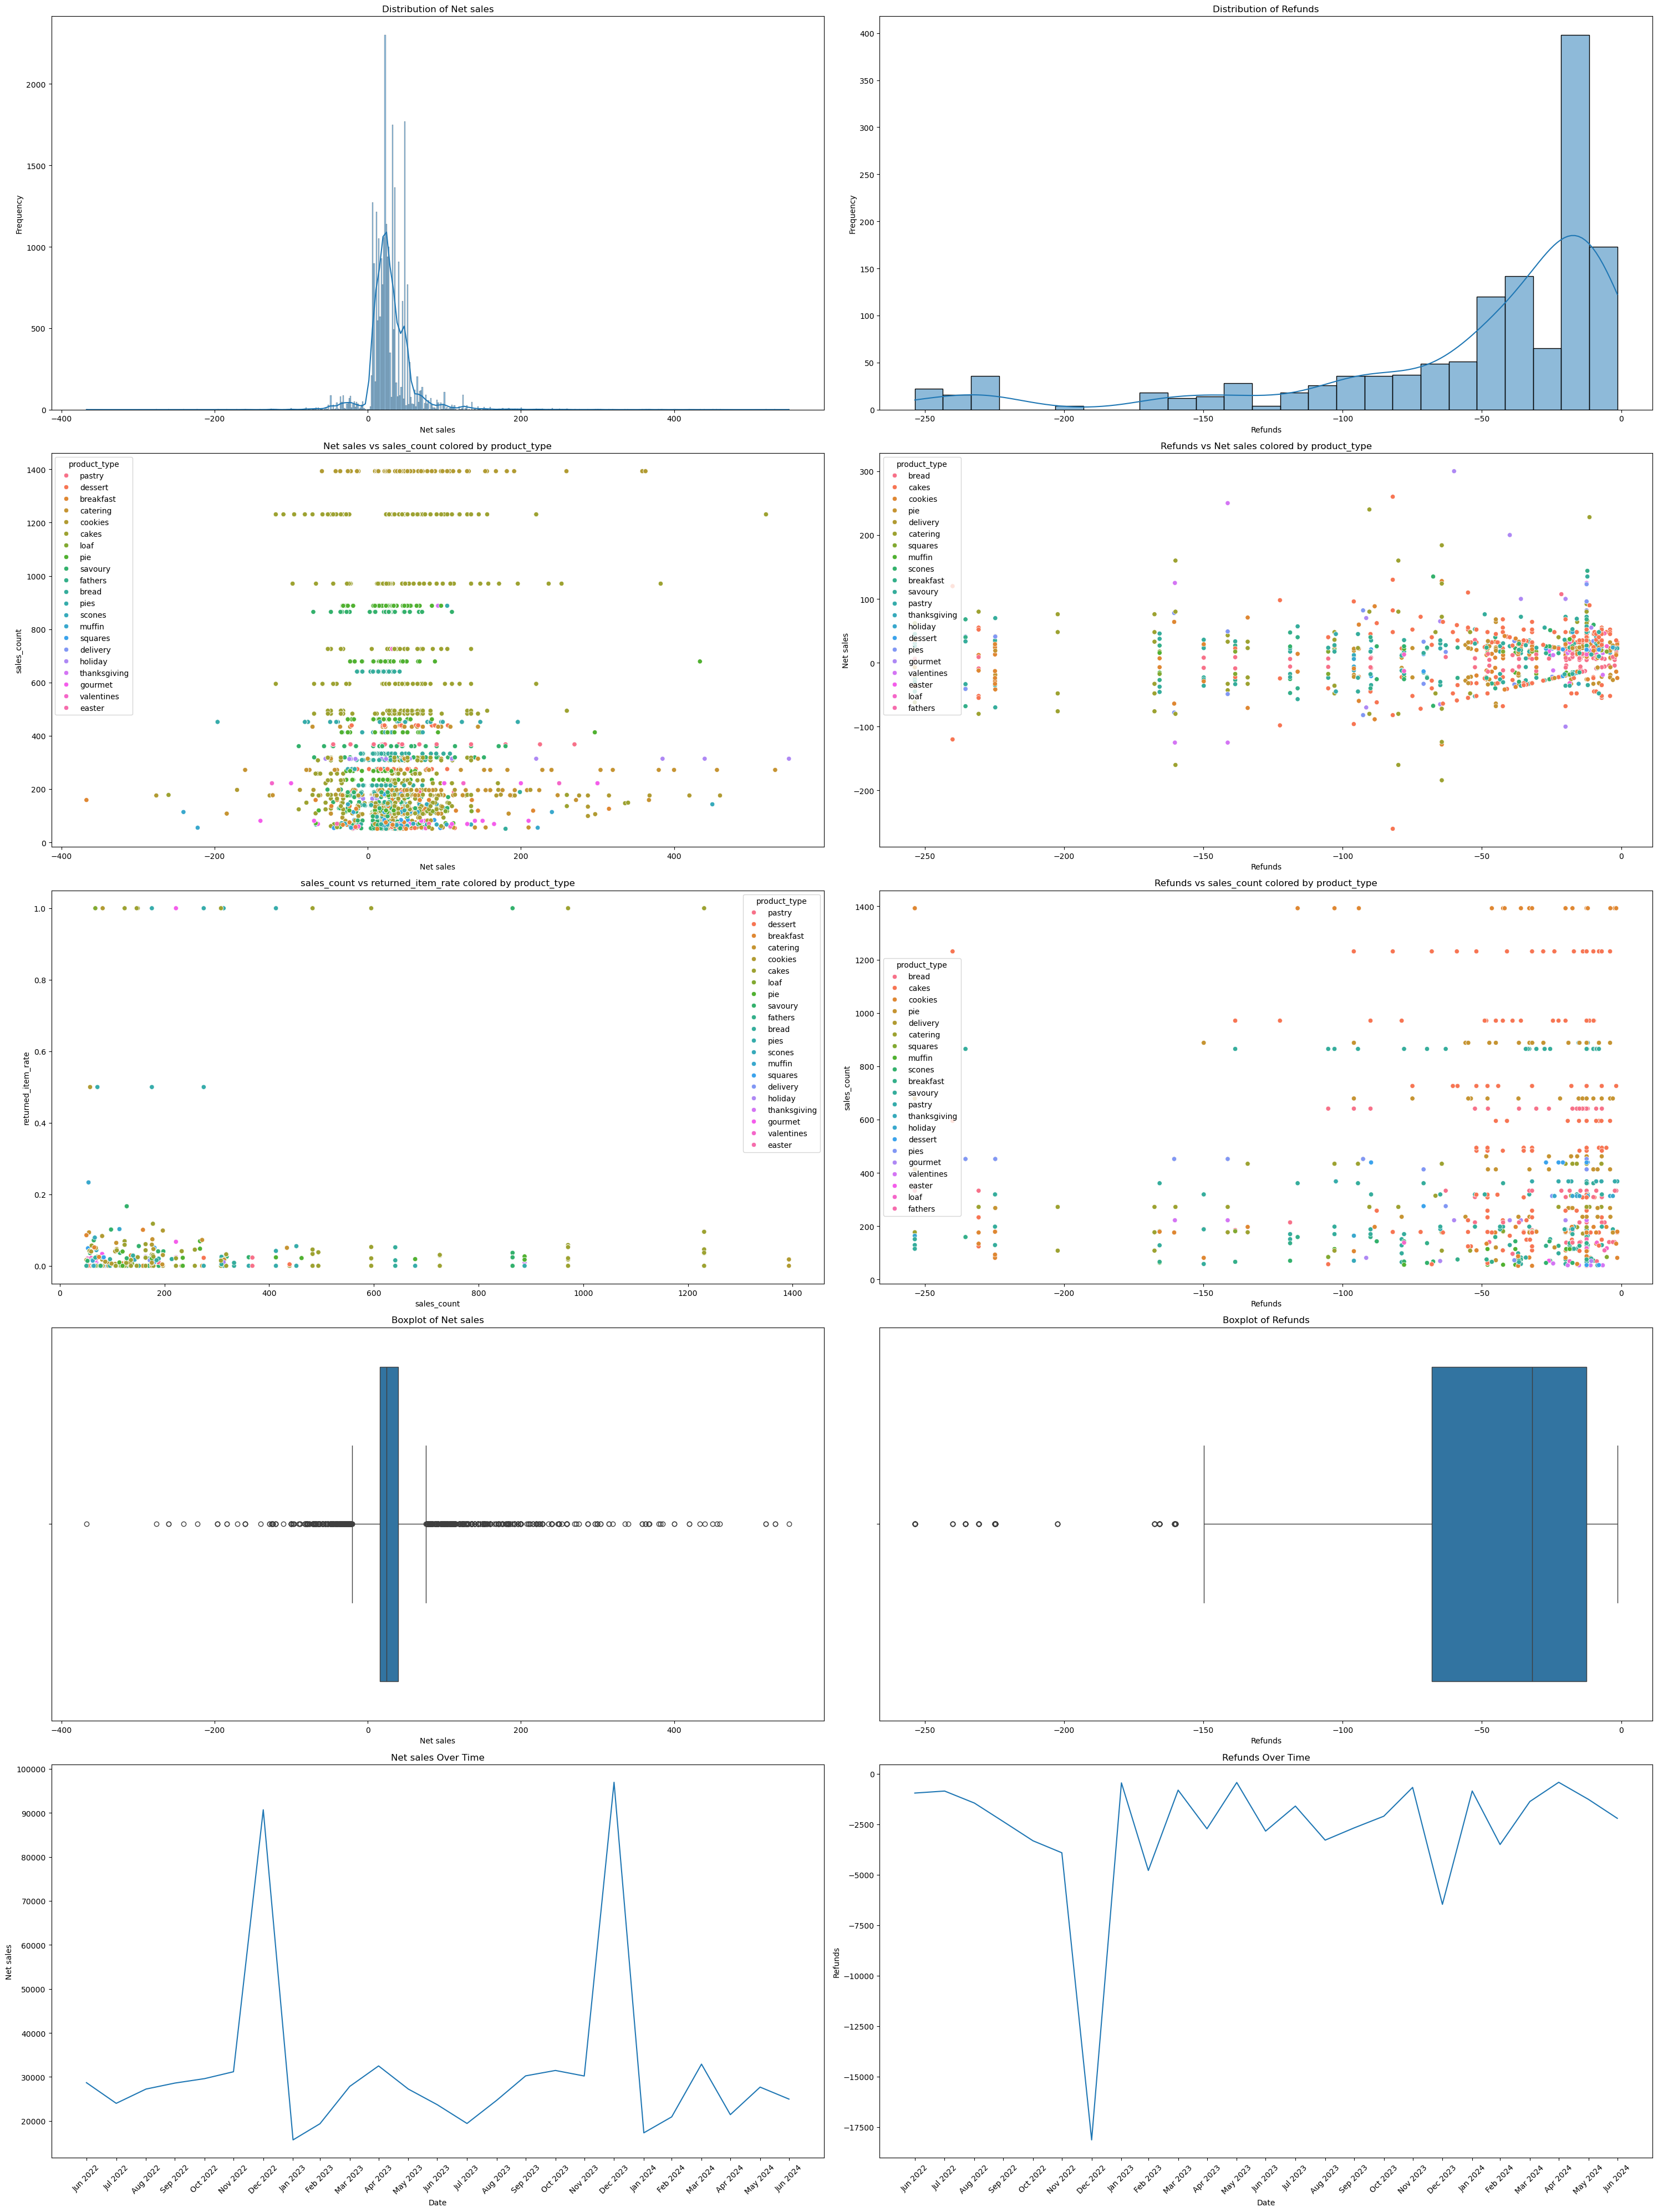

In [315]:
def combined_visualizations(df):
    fig, axes = plt.subplots(5, 2, figsize=(30, 40))
    
    # Ensure the Date column is in datetime format
    if df['Date'].dtype != 'datetime64[ns, UTC]':
        df['Date'] = pd.to_datetime(df['Date'], utc=True)
    
    # Distribution plots
    plot_distribution(axes[0, 0], df, 'Net sales')
    
    refunds_negative_df = df[df['Refunds'] < 0].copy()  # Create a copy to avoid SettingWithCopyWarning
    plot_distribution(axes[0, 1], refunds_negative_df, 'Refunds')
    
    # Scatterplots
    plot_scatterplot(axes[1, 0], df, 'Net sales', 'sales_count', 'product_type')
    plot_scatterplot(axes[1, 1], refunds_negative_df, 'Refunds', 'Net sales', 'product_type')
    plot_scatterplot(axes[2, 0], df, 'sales_count', 'returned_item_rate', 'product_type')
    plot_scatterplot(axes[2, 1], refunds_negative_df, 'Refunds', 'sales_count', 'product_type')
    
    # Boxplots
    plot_boxplot(axes[3, 0], df, 'Net sales')
    plot_boxplot(axes[3, 1], refunds_negative_df, 'Refunds')
    
    # Time Series
    plot_time_series(axes[4, 0], df, 'Date', 'Net sales')
    plot_time_series(axes[4, 1], refunds_negative_df, 'Date', 'Refunds')
    
    # Adjust layout
    plt.tight_layout()
    
    # Save the combined plots
    save_path = '/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Plots/Shopify_Products_Combined_Visualizations.png'
    plt.savefig(save_path, bbox_inches='tight')
    
    plt.show()

# Ensure `shopify_cleaned_df` is defined and call the function
combined_visualizations(shopify_cleaned_df)


**Bar Plot of `Net Sales` and `Effective Net Sales` by `Product Type`**

This plot illustrates the comparison between net sales and effective net sales after accounting for refunds. It shows the proportion of actual sales versus the originally ordered amount, highlighting the proportion of refunds by product type.

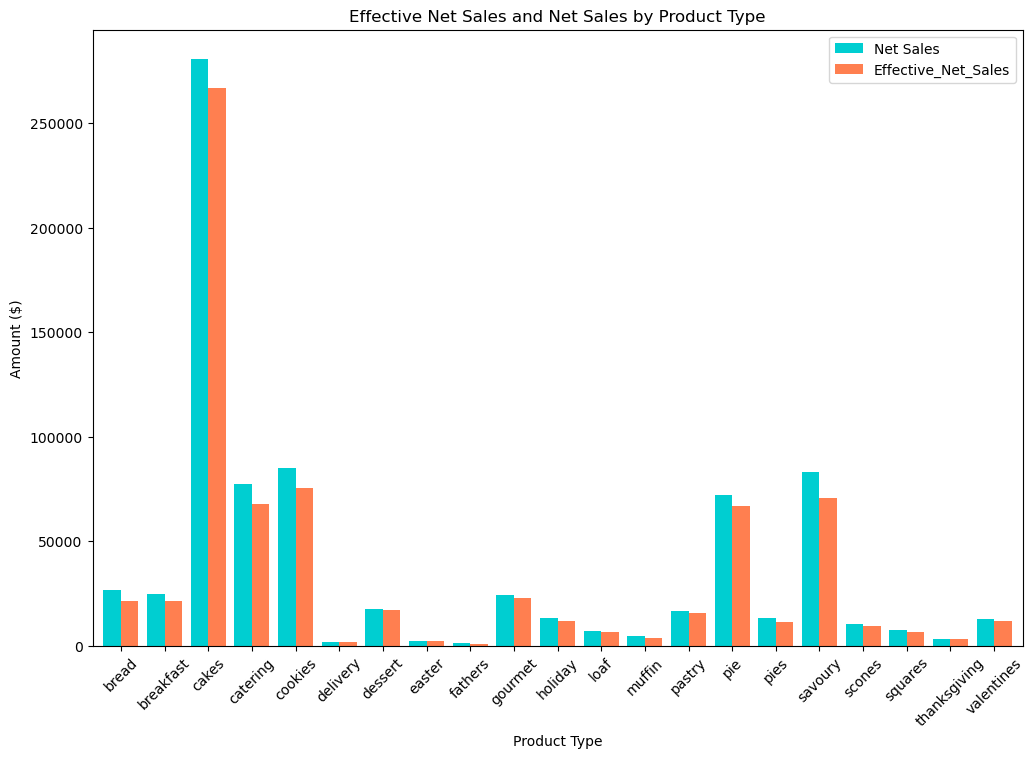

In [316]:
# Step 1: Aggregate the total net sales and total refunds by 'product_type'
agg_df = shopify_cleaned_df.groupby('product_type').agg(
    Net_Sales=('Net sales', 'sum'),
    Total_Refunds=('Refunds', 'sum')
).reset_index()

# Step 2: Adjust the Net Sales based on total refunds
agg_df['Effective_Net_Sales'] = agg_df['Net_Sales'] + agg_df['Total_Refunds']

# Step 3: Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Set 'product_type' as the index
agg_df.set_index('product_type', inplace=True)

# Create a grouped bar plot
agg_df[['Net_Sales', 'Effective_Net_Sales']].plot(kind='bar', ax=ax, color=['#00CED1', '#FF7F50'], width=0.8)

# Adding labels and title
ax.set_title('Effective Net Sales and Net Sales by Product Type')
ax.set_xlabel('Product Type')
ax.set_ylabel('Amount ($)')
ax.legend(['Net Sales', 'Effective_Net_Sales'])
plt.xticks(rotation=45)

# Save the plot
save_path = '/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Plots/Shopify_Products_Barplot_EffectiveSalesvsSales.png'
plt.savefig(save_path, bbox_inches='tight')

plt.show()


In [317]:
print(agg_df.head())


              Net_Sales  Total_Refunds  Effective_Net_Sales
product_type                                               
bread          26414.57       -4983.00             21431.57
breakfast      24554.85       -3098.57             21456.28
cakes         280783.89      -13819.97            266963.92
catering       77335.53       -9461.68             67873.85
cookies        84936.21       -9666.43             75269.78


In [318]:
shopify_cleaned_df.columns

Index(['Sale ID', 'Date', 'Order ID', 'Order', 'Product', 'Net sales',
       'Payment type', 'Credit card', 'Credit card type', 'Billing country',
       'Refunds', 'Net payments', 'returned_item_rate', 'product_type',
       'sales_count'],
      dtype='object')

## 1.4 Final Preprocessing - Shopify Products

In [319]:
shopify_cleaned_df =pd.read_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Shopify Products for Analysis.csv', parse_dates=['Date'])

# Group by 'Product' and filter for products that have more than one unique 'product_type'
products_with_multiple_types = shopify_cleaned_df.groupby('Product').filter(lambda x: x['product_type'].nunique() > 1)

# Display the first few products that have more than one product type
print('pie:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='pie'].value_counts())
print('\npies:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='pies'].value_counts())
print('\ndessert:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='dessert'].value_counts())
print('\ncakes:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='cakes'].value_counts())
print('\nsavoury:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='savoury'].value_counts())
print('\ncookies:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='cookies'].value_counts())
print('\nholiday:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='holiday'].value_counts())
print('\ncatering:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='catering'].value_counts())
print('\nbread:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='bread'].value_counts())
print('\nvalentines:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='valentines'].value_counts())
print('\nbreakfast:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='breakfast'].value_counts())
print('\ngourmet:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='gourmet'].value_counts())
print('\neaster:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='easter'].value_counts())
print('\nthaksgiving:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='thanksgiving'].value_counts())
print('\nsquares:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='squares'].value_counts())
print('\nfathers:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='fathers'].value_counts())


pie:
 Product
apple pie                 787
9inch pumpkin pie         672
raspberry pie             374
chocolate cream pie       152
strawberry rhubarb pie    116
9inch peach pie            60
Name: count, dtype: int64

pies:
 Product
24 piece square tray        228
raspberry pie                39
baked fruit tart             28
chocolate cream pie          24
8inch lemon meringue pie     18
9inch peach pie              12
9inch pumpkin pie             5
strawberry rhubarb pie        4
apple pie                     3
small shepherds pie           1
chicken pot pie               1
Name: count, dtype: int64

dessert:
 Product
guinness  ginger cake    437
baked fruit tart         242
2 iced shortbread         26
6 sprinkle shortbread      7
Name: count, dtype: int64

cakes:
 Product
chocolate raspberry mousse cake    717
brownie cobbler slabs               77
chocolate chip cookie cake           4
2 lb fruitcake                       3
guinness  ginger cake                2
easter cupcak

In [320]:
# Mapping of products to their correct product types
product_type_mapping = {
    # 'pie' and 'pies'
    '24 piece square tray': 'catering',
    'small shepherds pie': 'savoury',
    'chicken pot pie': 'savoury',
    '8inch lemon meringue pie': 'pie',
    'raspberry pie': 'pie',
    'chocolate cream pie': 'pie',
    '9inch peach pie': 'pie',
    '9inch pumpkin pie': 'pie',
    'strawberry rhubarb pie': 'pie',
    'apple pie': 'pie',
    
    # 'dessert'
    'guinness  ginger cake': 'pastry',
    'baked fruit tart': 'pie',
    '2 iced shortbread': 'cookies',
    '6 sprinkle shortbread': 'cookies',
    
    # 'cakes'
    'chocolate raspberry mousse cake': 'cakes',
    'brownie cobbler slabs': 'squares',
    'chocolate chip cookie cake': 'cakes',
    '2 lb fruitcake': 'cakes',
    'easter cupcakes  pack of 4': 'cakes',
    
    # 'savoury'
    '2lb mac  cheese': 'savoury',
    'crostini': 'bread',
    
    # 'cookies'
    'baked goods gift box': 'catering',
    '500ml rum sauce': 'holiday',
    '6 cup plum pudding': 'holiday',
    '6 linzer cookies': 'cookies',
    
    # 'holiday'
    '8inch lemon meringue pie': 'pie',  # Already reassigned
    'baked goods gift box': 'catering',  # Already reassigned
    
    # 'catering'
    'breakfast pastry selection': 'catering',
    'will you be my valentine treat box': 'catering',
    
    # 'valentines'
    'new years eve 5 course dinner for 2': 'gourmet',
    
    # 'gourmet'
    'new years eve 5 course dinner for 2': 'gourmet',  # Already reassigned
    
    # 'easter'
    'easter cupcakes  pack of 4': 'cakes',  # Already reassigned
    '2 iced shortbread': 'cookies',  # Already reassigned
    
    # 'squares'
    'brownie cobbler slabs': 'squares',  # Already reassigned
    
    # 'fathers'
    '2lb mac  cheese': 'savoury',  # Already reassigned
    'chocolate chip cookie cake': 'cakes',  # Already reassigned
}

# Apply the mapping to update the 'product_type' in the DataFrame
shopify_cleaned_df['product_type'] = shopify_cleaned_df.apply(
    lambda x: product_type_mapping.get(x['Product'], x['product_type']), axis=1)


In [321]:
# Verify if there are any products with more than one product type left
products_with_multiple_types = shopify_cleaned_df.groupby('Product').filter(lambda x: x['product_type'].nunique() > 1)

# If this is empty, then the cleanup was successful
products_with_multiple_types


,Sale ID,Date,Order ID,Order,Product,Net sales,Payment type,Credit card,Credit card type,Billing country,Refunds,Net payments,returned_item_rate,product_type,sales_count


In [322]:
# Save data frame. 

shopify_cleaned_df.to_csv('/Users/elizaclapasmac/Desktop/Repositories/Final Project/Final-Project---LHL/Data/1.- Data Collection, Preprocessing and EDA/Shopify Products for Analysis.csv', index=False)

In [323]:
shopify_cleaned_df.shape

(26394, 15)

In [324]:
# Group by 'Product' and filter for products that have more than one unique 'product_type'
products_with_multiple_types = shopify_cleaned_df.groupby('Product').filter(lambda x: x['product_type'].nunique() > 1)

# Display the first few products that have more than one product type
print('pie:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='pie'].value_counts())
print('\npies:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='pies'].value_counts())
print('\ndessert:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='dessert'].value_counts())
print('\ncakes:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='cakes'].value_counts())
print('\nsavoury:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='savoury'].value_counts())
print('\ncookies:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='cookies'].value_counts())
print('\nholiday:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='holiday'].value_counts())
print('\ncatering:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='catering'].value_counts())
print('\nbread:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='bread'].value_counts())
print('\nvalentines:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='valentines'].value_counts())
print('\nbreakfast:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='breakfast'].value_counts())
print('\ngourmet:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='gourmet'].value_counts())
print('\neaster:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='easter'].value_counts())
print('\nthaksgiving:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='thanksgiving'].value_counts())
print('\nsquares:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='squares'].value_counts())
print('\nfathers:\n', products_with_multiple_types['Product'][products_with_multiple_types['product_type']=='fathers'].value_counts())


pie:
 Series([], Name: count, dtype: int64)

pies:
 Series([], Name: count, dtype: int64)

dessert:
 Series([], Name: count, dtype: int64)

cakes:
 Series([], Name: count, dtype: int64)

savoury:
 Series([], Name: count, dtype: int64)

cookies:
 Series([], Name: count, dtype: int64)

holiday:
 Series([], Name: count, dtype: int64)

catering:
 Series([], Name: count, dtype: int64)

bread:
 Series([], Name: count, dtype: int64)

valentines:
 Series([], Name: count, dtype: int64)

breakfast:
 Series([], Name: count, dtype: int64)

gourmet:
 Series([], Name: count, dtype: int64)

easter:
 Series([], Name: count, dtype: int64)

thaksgiving:
 Series([], Name: count, dtype: int64)

squares:
 Series([], Name: count, dtype: int64)

fathers:
 Series([], Name: count, dtype: int64)
